**Business Case Study: Walmart : Confidence Interval and CLT**

* **Author**: Debojit Gogoi.

* **EMail**: debojitgogoi.blr@gmail.com

* **Dataset**: Limited access

**Business problem definition**: The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

**Declaration**: This dataset does not belong to the author. The author only wants to use the dataset and create insights using opensource tools. The aim of this experiment is learning and no other business motives are addressed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Understand the Data
**KPIs**

For the given scenario, the following Key Performance Indicators (KPIs) can be defined:

**Average Purchase Amount by Gender:**
* This KPI measures the average purchase amount per transaction for male and female customers separately.
* Calculation: Total purchase amount by gender / Total number of transactions by gender.

**Gender-Based Spending Ratio:**
* This KPI compares the total purchase amount spent by female customers to that spent by male customers.
* Calculation: Total purchase amount by females / Total purchase amount by males.

**Confidence Intervals for Average Spending by Gender:**
* This KPI assesses the confidence intervals for the average spending of male and female customers to understand the range within which the true population mean may lie.
* Calculation: Confidence interval for average spending by male customers, Confidence interval for average spending by female customers.

**Overlap of Confidence Intervals:**
* This KPI indicates whether the confidence intervals for average spending by male and female customers overlap or not, providing insight into potential differences in spending habits.
* Calculation: Check if the confidence intervals for male and female spending overlap.

**Recommendations Impacting Gender-Based Marketing Strategies:**
* This KPI evaluates the impact of insights derived from the analysis on marketing strategies targeted towards male and female customers.
* Calculation: Assess changes in marketing strategies based on insights gained from gender-based spending analysis.

In [2]:
!wget "walmart_data.csv" -O walmart.csv
df = pd.read_csv("walmart.csv")
df.head()

--2024-05-12 14:20:17--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  79.1MB/s    in 0.3s    

2024-05-12 14:20:17 (79.1 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [3]:
df.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.shape

(550068, 10)

**OBSERVATIONS:**

* There are 550068 entries with 10 columns for each entry.
* Its observed that for our business case we need categorical data. We shall dhange the data_type of all items except Purchase to categorical data.

# Data Corrections and Insigts

**Change the data type of columns to category type except for Purchase**


In [6]:
for column in df.columns[:-1]:
  print(column)
  df[column] = df[column].astype('category')
print(df.info())

User_ID
Product_ID
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB
None


**Check for duplicates and null values**

In [7]:
# check for duplicates
print(df.duplicated().value_counts())
# check for null values
print(df.isnull().sum())

False    550068
Name: count, dtype: int64
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


**Observation:**

No duplicate values are observed.

No null values are observed.

**Check for dataframe statistics**

In [8]:
# check for numerical statistics
print("\n ****** Numerical Statistics ****** \n")
print(df.describe())
# check for object statistics
print("\n ****** Object Statistics ****** \n")
print(df.describe(include="category"))


 ****** Numerical Statistics ****** 

            Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000

 ****** Object Statistics ****** 

        User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  
count                      550068          550068            550068  
unique                          5               2                20  
top                             1               0                 5  
freq                       193821          324731            150933  


['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']


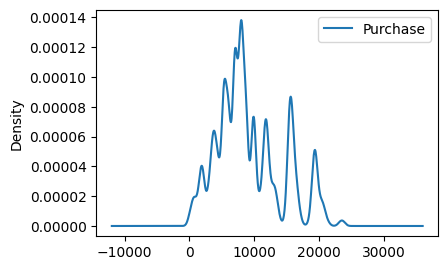

In [9]:
# check skewness
cat_cols = df.dtypes=="category"
cat_cols = list(cat_cols[cat_cols].index)
print(cat_cols)
plt.rcParams["figure.figsize"] = [15, 10]
df.plot(kind='density', subplots=True, layout=(3,3), sharex= False)
plt.show()

**Observations:**

* The purchase amount is at 12 dollars minimum and 23961 dollars maximum.
* The median purchase amount is 8047 dollars and mean is 9264 dollars. Median is lower than the mean purchase amount. This means that the distribution is right skewed.
* From the User_ID column it is observed that there are 5891 unique items. Hence 5891 unique users. This also means that the same user buys multiple product.
* From the Product_ID column it is observed that there are 3631 unique product items. Product id P00265242 has the highest sales with frequency of 1880 units.
* There are 2 genders: preferably male and female from Gender column. Males are the highest purchasers.
* There are 7 different age ranges. The range of 26-35 years have the highest purchases. This also mean that the young generation buy more products from Walmart.
* The dataframe is distributed amongst 21 unique occupations with pccupation id 4 having made the most purchases in Walmart.
* There are 5 unique stay in cities and city 1 had the top purchases with count 193821 purchases.
* There are 3 unique city categories with category B having the highest purchases with frequency 231173.
* There are 2 unique marital statuses and status 0 which is married have higher purchases in Walmart.
* There are 20 product categories with category 5 having the higest sales.

**Check for unique items for every column**

In [10]:
for column in df.columns:
  print(f"\nThe unique value of {column} are: \n")
  print(df[column].unique())
  print('*'* 100)


The unique value of User_ID are: 

[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
****************************************************************************************************

The unique value of Product_ID are: 

['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
****************************************************************************************************

The unique value of Gender are: 

['F', 'M']
Categories (2, object): ['F', 'M']
****************************************************************************************************

The unique value 

**Observation**


*   No problematic data is observed.
*   For further calculations we need to clean data for Marital_status: 0 for married, 1 for unmarried.

In [11]:
# replace Marital_status data
df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
print(df['Marital_Status'].unique())
print(df.head())
# print(df.tail())

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']
   User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2      Unmarried                3      8370  
1                          2      Unmarried                1     15200  
2                          2      Unmarried               12      1422  
3                          2      Unmarried               12      1057  
4                         4+      Unmarried                8      7969  


# Exploratory Data Analysis
# Univariate Analysis

**Numerical Analysis**

There is only Purchase that is Numerical.

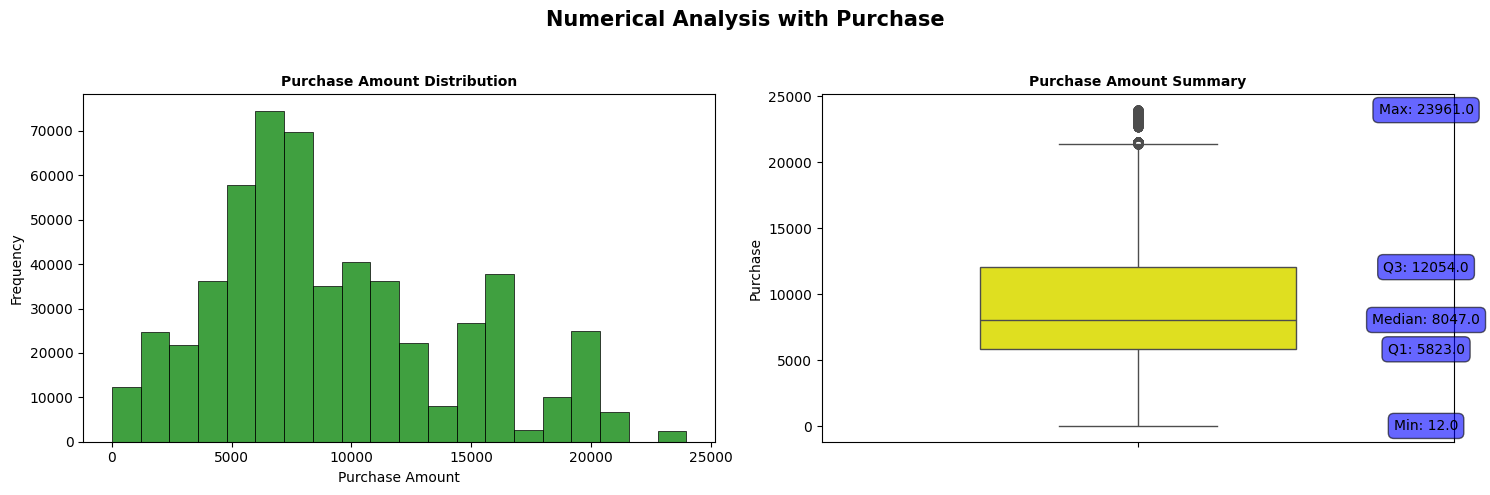

In [12]:
# create figure and subplots manually
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Numerical Analysis with Purchase', fontsize=15, fontweight='bold')

# histogram subplot
ax1 = fig.add_subplot(121)
sns.histplot(data=df['Purchase'], color='green', linewidth=0.5, edgecolor='black', bins=20, ax=ax1)
ax1.set_title("Purchase Amount Distribution", fontsize=10, fontweight='bold')
ax1.set_xlabel('Purchase Amount', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

# boxplot subplot
ax2 = fig.add_subplot(122)
sns.boxplot(data=df['Purchase'], color="yellow", ax=ax2, width=0.5)
ax2.set_title('Purchase Amount Summary', fontsize=10, fontweight='bold')

# function to annotate boxplot with statistical values
def annotate_boxplot(ax, data):
    min_val = data.min()
    max_val = data.max()
    median_val = data.median()
    q1_val = data.quantile(0.25)
    q3_val = data.quantile(0.75)

    # annotations
    for val, label in zip([min_val, q1_val, median_val, q3_val, max_val], ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        ax.annotate(text=f"{label}: {val:.1f}", xy=(0.5, val), xytext=(-20, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.4', fc='blue', alpha=0.6))

# add annotations for min, Q1, median, Q3, and max to the boxplot
annotate_boxplot(ax2, df['Purchase'])

# adjusting layout for better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [13]:
# calculate the length of the outliers:
outliers = len(df.loc[df['Purchase'] > 21399,'Purchase'])
print(f"The number of outliers are {outliers}")


The number of outliers are 2677


**Observations**

*   The total number of outliers is 2677. This indicates that there is a significant variability of how much customers are spending. Some customers might be making exceptionally large purchases compared to the typical spending patterns observed in the majority of the data.
*   Majority of the customers spend between 5823 dollars and 12054 dollars. And the median purchase amount is 8047 dollars.
* The minimum amount spent is 12 dollars and the maximum amount is 23961 dollars. This also means that there can be a very small item purchase and also a vary large order that may contain bulk items.



**Categorical Analysis**



**Gender, Marital Status, City**

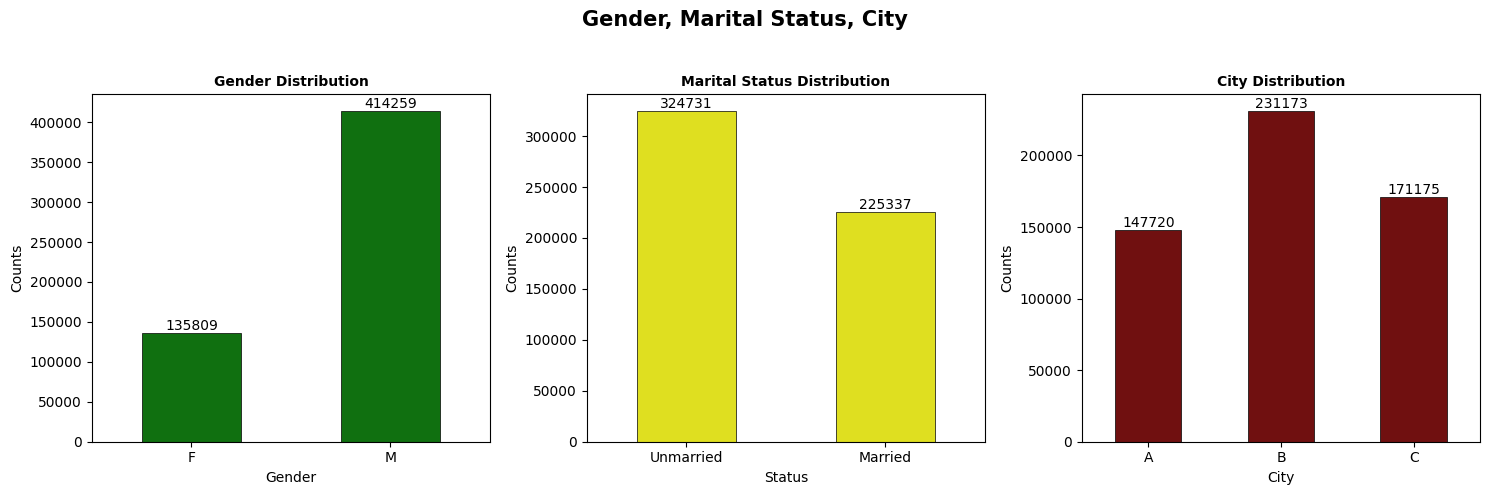

In [14]:
# create figure and subplots manually
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Gender, Marital Status, City', fontsize=15, fontweight='bold')

# function to label containers with count
def b_count(ax):
  for i in ax.containers:
    ax.bar_label(i,)

# barplot gender
ax1 = fig.add_subplot(131)
count_gender = df['Gender'].value_counts()
sns.barplot(data=count_gender, width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Gender Distribution", fontsize=10, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)

# barplot marital status
ax2 = fig.add_subplot(132)
count_marital_status = df['Marital_Status'].value_counts()
sns.barplot(data=count_marital_status, width=0.5, color='yellow', linewidth=0.5, edgecolor='black', ax=ax2)
b_count(ax=ax2)
ax2.set_title('Marital Status Distribution', fontsize=10, fontweight='bold')
ax2.set_xlabel('Status', fontsize=10)
ax2.set_ylabel('Counts', fontsize=10)

# barplot city
ax3 = fig.add_subplot(133)
count_city = df['City_Category'].value_counts()
sns.barplot(data=count_city, width=0.5, color='maroon', linewidth=0.5, edgecolor='black', ax=ax3)
b_count(ax=ax3)
ax3.set_title('City Distribution', fontsize=10, fontweight='bold')
ax3.set_xlabel('City', fontsize=10)
ax3.set_ylabel('Counts', fontsize=10)

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Observation:**

* There are 2 genders: Male and Female. Males are in higher quantity, about 3 times more. This indicates that Males buy more frequently in Walmart and they tend to buy 3 times more than females.
* Unmarried ppeople buy more products from Walmart. This may also mean that unmarried males buy more product from Walmart.
* City B has more footfall in Walmart than A and B. A and B are almost similar to their counts. This could probably mean that City B is nearer to the Walmart. This could also mean that city A and city B may have other options than Walmart to go.



**Customer Age Distribution**


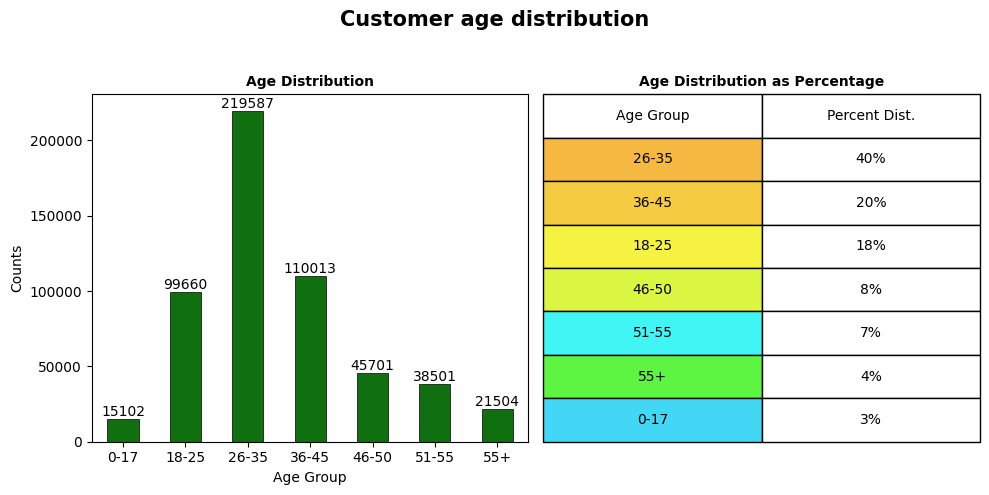

In [15]:
# create figure and subplots manually
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Customer age distribution', fontsize=15, fontweight='bold')

# function to label containers with count
def b_count(ax):
  for i in ax.containers:
    ax.bar_label(i,)

# barplot age distribution
ax1 = fig.add_subplot(121)
count_age = df['Age'].value_counts()
sns.barplot(data=count_age, width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Age Distribution", fontsize=10, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)

# tableplot age distribution
ax2 = fig.add_subplot(122)

#calculate the percentage distribution
count_age = df['Age'].value_counts()
values = df['Age'].value_counts().keys().tolist()
counts = df['Age'].value_counts().tolist()
ordered_counts = zip(values, counts)
final = list()
for items in list(ordered_counts):
  calc = f"{str(round(items[1]/sum(counts)*100))}%"
  iter_data = [items[0], calc]
  final.append(iter_data)

# plot table
color_palate = [["#f5b942",'#FFFFFF'],["#f5cb42",'#FFFFFF'],['#f5f242','#FFFFFF'],['#daf542','#FFFFFF'],['#42f5f5','#FFFFFF'],
            ['#5df542','#FFFFFF'],['#42d7f5','#FFFFFF']]
table = ax2.table(cellText=final, cellColours=color_palate, cellLoc='center', colLabels=['Age Group','Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(10)
ax2.set_title("Age Distribution as Percentage", fontsize=10, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=10)
ax2.axis('off')

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation:**

* Its observed that the age group of 26-35 is the highest at 40% and buy the most items from Walmart. This can indicate that the young population buys more items from Walmart. It is also a high possibility that this age group is getting ready to be married and are buying items for home improvement. They would be more interested in discounts and deals.
* Its also observe that the middle age ranges 46-55 occupy 15% of the total items. This indicates that although they have high spending power they rarely buy items from Walmart. It may also indicate that Walmart do not have items/products that interest this group anymore.
* The young population of teenagers aged 0-17 are at 3% only. This indicates that their spending power is low and they are ususally dependents.

**Customer Current City Distribution**


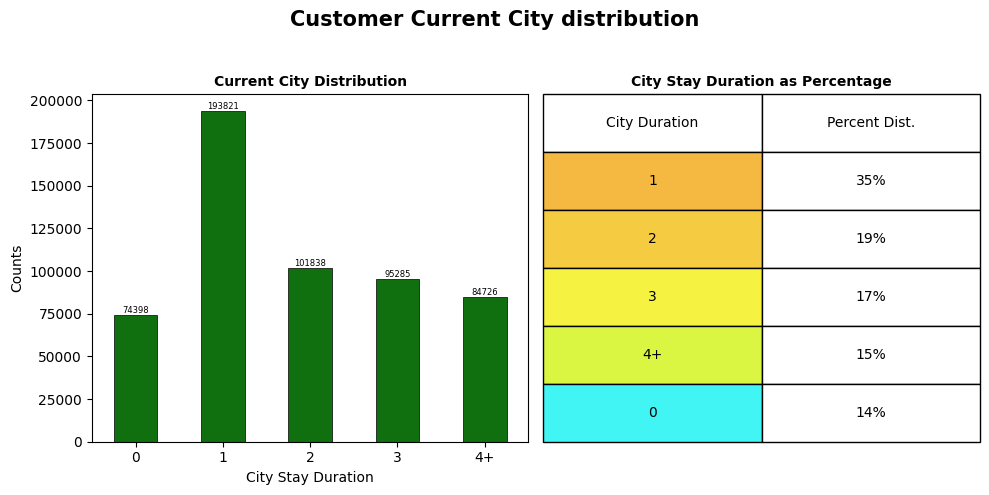

In [16]:
# create figure and subplots manually
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Customer Current City distribution', fontsize=15, fontweight='bold')

# function to label containers with count
def b_count(ax):
  for i in ax.containers:
    ax.bar_label(i, size=6)

# barplot city distribution
ax1 = fig.add_subplot(121)
count_city = df['Stay_In_Current_City_Years'].value_counts()
sns.barplot(data=count_city, width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Current City Distribution", fontsize=10, fontweight='bold')
ax1.set_xlabel('City Stay Duration', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)

# tableplot age distribution
ax2 = fig.add_subplot(122)

#calculate the percentage distribution
count_age = df['Stay_In_Current_City_Years'].value_counts()
values = df['Stay_In_Current_City_Years'].value_counts().keys().tolist()
counts = df['Stay_In_Current_City_Years'].value_counts().tolist()
ordered_counts = zip(values, counts)
final = list()
for items in list(ordered_counts):
  calc = f"{str(round(items[1]/sum(counts)*100))}%"
  iter_data = [items[0], calc]
  final.append(iter_data)

# plot table
color_palate = [["#f5b942",'#FFFFFF'],["#f5cb42",'#FFFFFF'],['#f5f242','#FFFFFF'],['#daf542','#FFFFFF'],['#42f5f5','#FFFFFF']]
table = ax2.table(cellText=final, cellColours=color_palate, cellLoc='center', colLabels=['City Duration','Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(10)
ax2.set_title("City Stay Duration as Percentage", fontsize=10, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=10)
ax2.axis('off')

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation**

* It is observed that the customers who have stayed for 1 year and above have the highest footfall in Walmart and buy more products from Walmart. This may indicate that these customers have recently moved and are working on home improvement.
* Its also observed that people who have stayed 2, 3 , 4+ years are at about the same distrobution. This means that they stay loyal to the Walmart. However its also observed that they are gradually losing interest in Walmart products.
* Its observed that the loyal customers and new customers have different preferences.
* Since loyal customers are losing interest, Walmart needs to improve its strategy for this customer segment.

**Customer Occupation Distribution**

**Consider only the top 10 occupations**

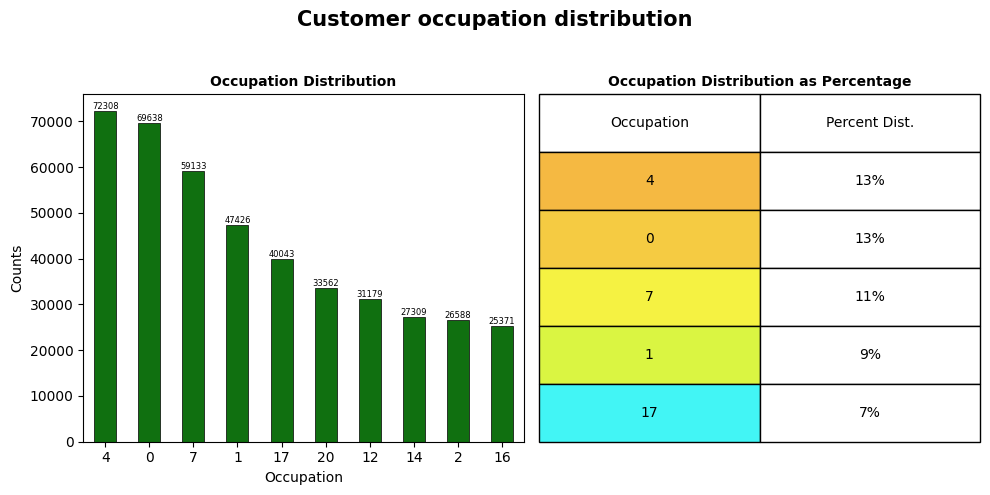

In [17]:
# create figure and subplots manually
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Customer occupation distribution', fontsize=15, fontweight='bold')

# barplot city distribution
ax1 = fig.add_subplot(121)
occupation_counts = df['Occupation'].value_counts().nlargest(10)

# Creating a DataFrame from the value counts
occupation_df = pd.DataFrame({'Occupation': occupation_counts.index, 'Counts': occupation_counts.values})
sns.barplot(x='Occupation', y='Counts', data=occupation_df, order=occupation_df.sort_values('Counts', ascending=False).Occupation,
            width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Occupation Distribution", fontsize=10, fontweight='bold')
ax1.set_xlabel('Occupation', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)

# tableplot age distribution
ax2 = fig.add_subplot(122)

# calculate the percentage distribution
# consider only top 5 values
count_age = df['Occupation'].value_counts().nlargest(5)
values = df['Occupation'].value_counts().keys().tolist()
counts = df['Occupation'].value_counts().tolist()
ordered_counts = zip(values, counts)
final = list()
for items in list(ordered_counts):
  calc = f"{str(round(items[1]/sum(counts)*100))}%"
  iter_data = [items[0], calc]
  final.append(iter_data)
final = final[0:5]

# plot table
color_palate = [["#f5b942",'#FFFFFF'],["#f5cb42",'#FFFFFF'],['#f5f242','#FFFFFF'],['#daf542','#FFFFFF'],['#42f5f5','#FFFFFF']]
table = ax2.table(cellText=final, cellColours=color_palate, cellLoc='center', colLabels=['Occupation','Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(10)
ax2.set_title("Occupation Distribution as Percentage", fontsize=10, fontweight='bold')
ax2.set_xlabel('Occupation', fontsize=10)
ax2.axis('off')

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation**

* Its observed that the top 3 occupations are 4, 0, 7.
* Its observed that the top 3 occupations occupy 37% of the total distribution.
* These customers have high demand for Walmart product.
* These customers have high disposable income.

**Product Id and Category against Sales**

**Pick the top 10 Product Id and Product Category**

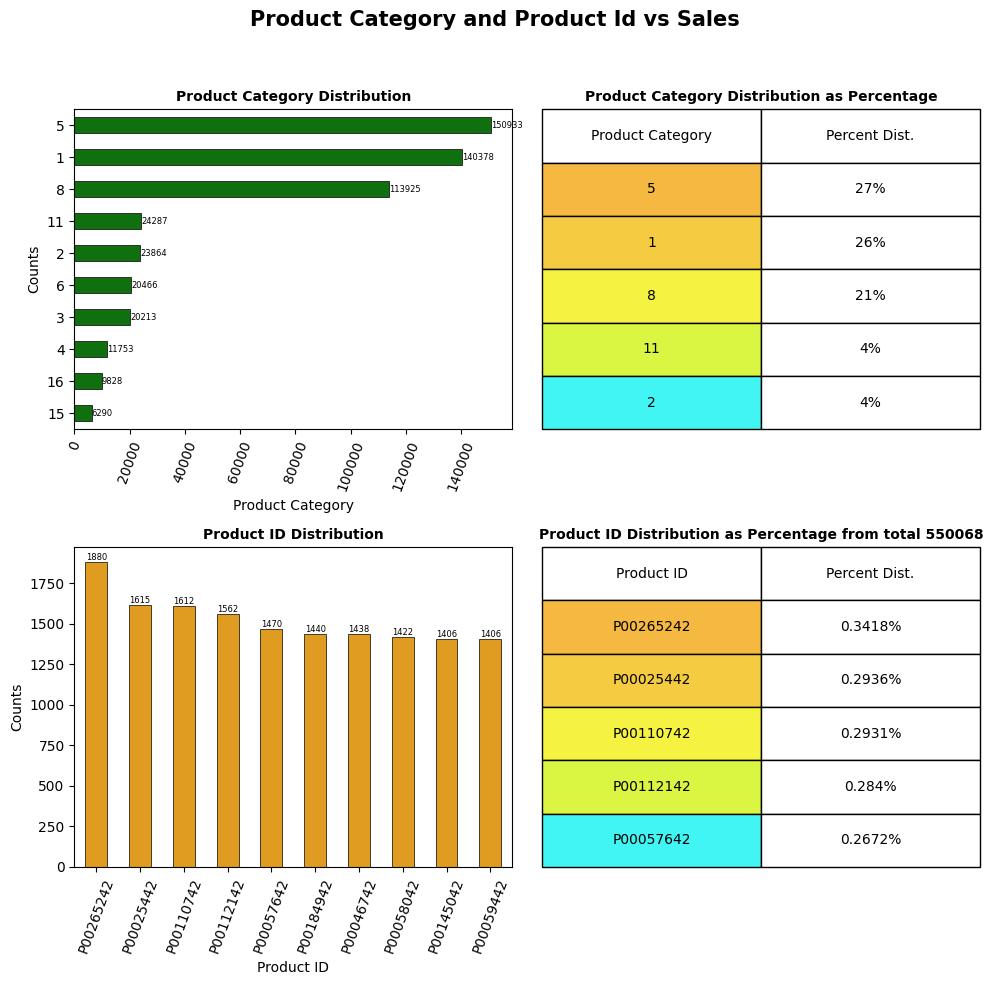

In [18]:
# create figure and subplots manually
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Product Category and Product Id vs Sales', fontsize=15, fontweight='bold')


# barplot product category distribution
ax1 = fig.add_subplot(221)
occupation_counts = df['Product_Category'].value_counts().nlargest(10)

# Creating a DataFrame from the value counts
occupation_df = pd.DataFrame({'Product_Category': occupation_counts.index, 'Counts': occupation_counts.values})
sns.barplot(x='Counts', y='Product_Category', data=occupation_df, order=occupation_df.sort_values('Counts', ascending=False).Product_Category,
            width=0.5, color='green', linewidth=0.5, edgecolor='black', orient='h', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Product Category Distribution", fontsize=10, fontweight='bold')
ax1.set_xlabel('Product Category', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)
plt.xticks(rotation=70)

# tableplot age distribution
ax2 = fig.add_subplot(222)

# calculate the percentage distribution
# consider only top 5 values
count_age = df['Product_Category'].value_counts().nlargest(5)
values = df['Product_Category'].value_counts().keys().tolist()
counts = df['Product_Category'].value_counts().tolist()
ordered_counts = zip(values, counts)
final = list()
for items in list(ordered_counts):
  calc = f"{str(round(items[1]/sum(counts)*100))}%"
  iter_data = [items[0], calc]
  final.append(iter_data)
final = final[0:5]

# plot table
color_palate = [["#f5b942",'#FFFFFF'],["#f5cb42",'#FFFFFF'],['#f5f242','#FFFFFF'],['#daf542','#FFFFFF'],['#42f5f5','#FFFFFF']]
table = ax2.table(cellText=final, cellColours=color_palate, cellLoc='center', colLabels=['Product Category','Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(10)
ax2.set_title("Product Category Distribution as Percentage", fontsize=10, fontweight='bold')
ax2.axis('off')

# barplot product id distribution
ax3 = fig.add_subplot(223)
occupation_counts = df['Product_ID'].value_counts().nlargest(10)

# Creating a DataFrame from the value counts
occupation_df = pd.DataFrame({'Product_ID': occupation_counts.index, 'Counts': occupation_counts.values})
sns.barplot(x='Product_ID', y='Counts', data=occupation_df, order=occupation_df.sort_values('Counts', ascending=False).Product_ID,
            width=0.5, color='orange', linewidth=0.5, edgecolor='black', ax=ax3)
b_count(ax=ax3)
ax3.set_title("Product ID Distribution", fontsize=10, fontweight='bold')
ax3.set_xlabel('Product ID', fontsize=10)
ax3.set_ylabel('Counts', fontsize=10)
plt.xticks(rotation=70)

# # tableplot age distribution
ax4 = fig.add_subplot(224)

# calculate the percentage distribution
# consider only top 5 values
count_age = df['Product_ID'].value_counts().nlargest(5)
values_id = df['Product_ID'].value_counts().keys().tolist()
counts_id = df['Product_ID'].value_counts().tolist()
total_prod_sold = sum(counts_id)
ordered_counts = zip(values_id, counts_id)
final = list()
for items in list(ordered_counts):
  calc = f"{str(round(items[1]/total_prod_sold*100, 4))}%"
  iter_data = [items[0], calc]
  final.append(iter_data)
final = final[0:5]
# plot table
color_palate = [["#f5b942",'#FFFFFF'],["#f5cb42",'#FFFFFF'],['#f5f242','#FFFFFF'],['#daf542','#FFFFFF'],['#42f5f5','#FFFFFF']]
table = ax4.table(cellText=final, cellColours=color_palate, cellLoc='center', colLabels=['Product ID','Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(10)
ax4.set_title(f"Product ID Distribution as Percentage from total {total_prod_sold}", fontsize=10, fontweight='bold')
ax4.set_xlabel('Product_ID', fontsize=10)
ax4.axis('off')

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation**

* It is observed that product category 5, 1, 8 make the highest sales and cover more than 75% of the total sales.
* However the top Product IDs occupy only 0.34% of the total sales This also means that Walmart has a very high number of products for sales. This count was calculated to 550068 items.

# Bivariate Analysis

**Box plot all categories against purchase**

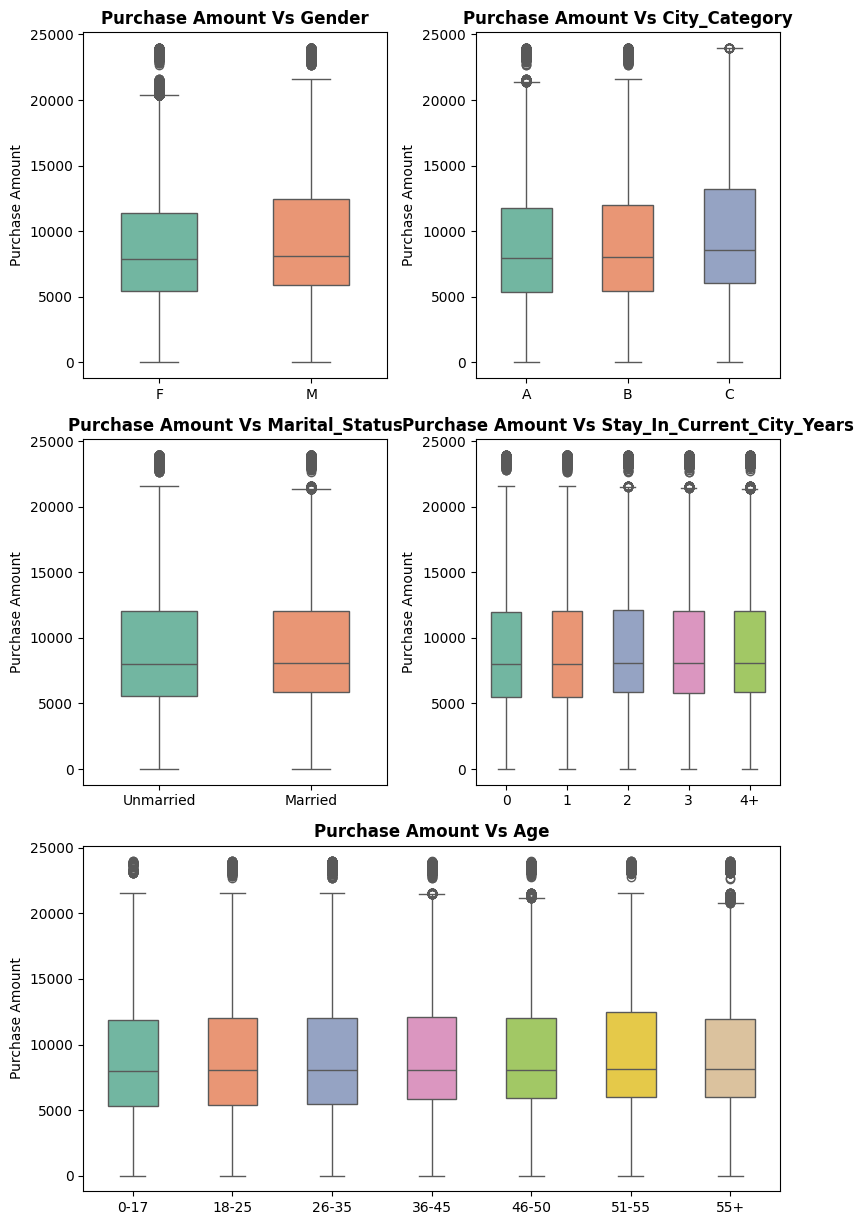

In [19]:
# create figure and subplots manually
fig = plt.figure(figsize = (8,13))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    # plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    # plot
    color_palette = sns.color_palette("Set2")
    sns.boxplot(data=df, x=k, y='Purchase', ax=ax0, width=0.5, palette=color_palette, hue=k)

    # plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'size':12,'weight':'bold'})

    # customizing axis
    ax0.set_ylabel('Purchase Amount')
    ax0.set_xlabel('')

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation**

* Its observed that the median is consistent at greater than USD 8000
* It also means that the purchase behaviour stays consistent across other parameters.


**Gender Vs Purchase**


In [20]:
# let's understand how gender and purchase behaviour is observed.

# filter the purchase amount by gender and then forward for other calculations
df_grp_gen_pur = df.groupby('Gender')['Purchase'].agg(['sum', 'count']).reset_index()

# aggregate the sum in billions
df_grp_gen_pur['purchase_in_billions'] = round(df_grp_gen_pur['sum']/10**9, 2)

# purchase in the form of billions
df_grp_gen_pur['%age_purchase'] = round((df_grp_gen_pur['sum']/df_grp_gen_pur['sum'].sum())*100, 2)

# calculate per purchase amount
df_grp_gen_pur['per_purchase'] = round(df_grp_gen_pur['sum']/df_grp_gen_pur['count'])

print(df_grp_gen_pur)

  Gender         sum   count  purchase_in_billions  %age_purchase  \
0      F  1186232642  135809                  1.19          23.28   
1      M  3909580100  414259                  3.91          76.72   

   per_purchase  
0        8735.0  
1        9438.0  


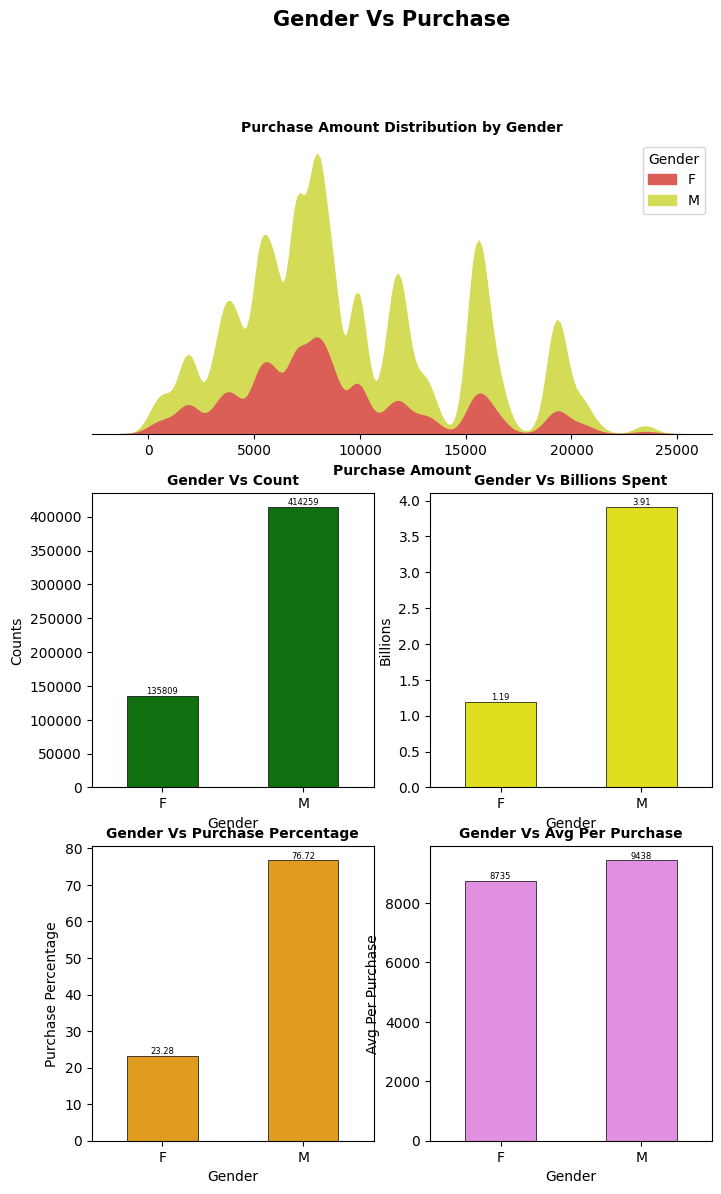

<Figure size 1500x1000 with 0 Axes>

In [21]:
# create figure and subplots manually
fig = plt.figure(figsize=(8, 13))
fig.suptitle('Gender Vs Purchase', fontsize=15, fontweight='bold')


# barplot gender count distribution
ax1 = fig.add_subplot(323)
sns.barplot(x="Gender", y='count', data=df_grp_gen_pur, width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Gender Vs Count", fontsize=10, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)

# barplot gender in billions spent distribution
ax2 = fig.add_subplot(324)
sns.barplot(x="Gender", y='purchase_in_billions', data=df_grp_gen_pur, width=0.5, color='yellow', linewidth=0.5, edgecolor='black', ax=ax2)
b_count(ax=ax2)
ax2.set_title("Gender Vs Billions Spent", fontsize=10, fontweight='bold')
ax2.set_xlabel('Gender', fontsize=10)
ax2.set_ylabel('Billions', fontsize=10)

# barplot gender in percentage spent distribution
ax3 = fig.add_subplot(325)
sns.barplot(x="Gender", y='%age_purchase', data=df_grp_gen_pur, width=0.5, color='orange', linewidth=0.5, edgecolor='black', ax=ax3)
b_count(ax=ax3)
ax3.set_title("Gender Vs Purchase Percentage", fontsize=10, fontweight='bold')
ax3.set_xlabel('Gender', fontsize=10)
ax3.set_ylabel('Purchase Percentage', fontsize=10)

# barplot gender in avg purchase amount per transaction
ax4 = fig.add_subplot(326)
avg = round(df_grp_gen_pur['per_purchase'].mean())
sns.barplot(x="Gender", y='per_purchase', data=df_grp_gen_pur, width=0.5, color='violet', linewidth=0.5, edgecolor='black', ax=ax4)
b_count(ax=ax4)
ax4.set_title("Gender Vs Avg Per Purchase", fontsize=10, fontweight='bold')
ax4.set_xlabel('Gender', fontsize=10)
ax4.set_ylabel('Avg Per Purchase', fontsize=10)

#plotting the kdeplot
ax5 = fig.add_subplot(311)
sns.kdeplot(data=df, x='Purchase', hue='Gender', palette=sns.color_palette('hls'), fill=True, alpha=1, ax=ax5)

#removing the axis lines
for s in ['top','left','right']:
    ax5.spines[s].set_visible(False)

# adjusting axis labels
ax5.set_yticks([])
ax5.set_ylabel('')
ax5.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 10)

#setting title for visual
ax5.set_title("Purchase Amount Distribution by Gender", fontsize=10, fontweight='bold')

plt.show()

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Observations**

* Its observed that Males spend more than 3 times than Females.
* The average transaction amount for Males is also higher than Females.
* The ditribution of Males spends vs Female spends do not follow a normal distribution. Hence we need to improve our statistic research.


**CLT on Gender Vs Purchases**

Here are the steps to apply the CLT on the 'Purchase' column of our DataFrame:

Decide on the sample size and number of samples: Choose a reasonable sample size and the number of samples you want to take from the 'Purchase' data.
For example: sample size of 50

Randomly sample the 'Purchase' data: Draw random samples from the 'Purchase' column of your DataFrame multiple times.
for example a random sample of 5000

Calculate the mean of each sample: Compute the mean of each sample and collect these means.

Plot the distribution of sample means: Use a histogram to visualize the distribution of the sample means.

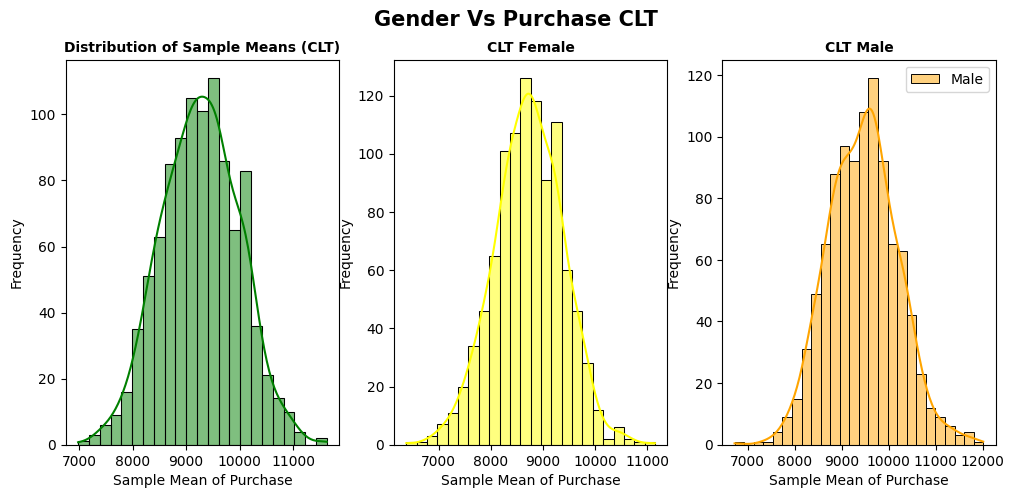

In [22]:
# assume sample, number of sampples for CLT
# Parameters

# create figure and subplots manually
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Gender Vs Purchase CLT', fontsize=15, fontweight='bold')


# histplot clt purchase distribution
ax1 = fig.add_subplot(131)
sample_size = 50
num_samples = 1000
sample_means = []

# Perform sampling
for _ in range(num_samples):
    sample = np.random.choice(df['Purchase'], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Plotting the distribution of sample means using seaborn
sns.histplot(sample_means, kde=True, color='green', binwidth=200, ax=ax1)
ax1.set_title("Distribution of Sample Means (CLT)", fontsize=10, fontweight='bold')
ax1.set_xlabel('Sample Mean of Purchase', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

# for gender we need to calculate separate means for male and female
# Initialize dictionaries to store sample means
sample_means = {'F': [], 'M': []}

# Perform sampling for each gender
for gender in ['F', 'M']:
    # Filter the dataframe by gender
    gender_data = df[df['Gender'] == gender]['Purchase']
    for _ in range(num_samples):
        sample = np.random.choice(gender_data, size=sample_size, replace=True)
        sample_means[gender].append(np.mean(sample))

# histplot clt purchase distribution
ax2 = fig.add_subplot(132)

# Plotting the distribution of sample means using seaborn
sns.histplot(sample_means['F'], color='yellow', kde=True, label='Female', binwidth=200, ax=ax2)
ax2.set_title("CLT Female", fontsize=10, fontweight='bold')
ax2.set_xlabel('Sample Mean of Purchase', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

# histplot clt purchase distribution
ax3 = fig.add_subplot(133)

# Plotting the distribution of sample means using seaborn
sns.histplot(sample_means['M'], color='orange', kde=True, label='Male', binwidth=200, ax=ax3)
ax3.set_title("CLT Male", fontsize=10, fontweight='bold')
ax3.set_xlabel('Sample Mean of Purchase', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)

plt.legend()
plt.show()


**Observation**

* From our above observation its seen that the Sample mean of purchase does follow a normal distribution.
* But we cannot conclude any impact of gender on the above distribution.
* While plotting for Female and Male CLT, it is observed that the purchase patterns do follow normal distribution for a random sample size.
* But this sample length does not do justice. We need to increase the sample size further and build an analysis for 90%, 95%, 99% confidence level.

In [23]:
# Function to calculate confidence intervals
def confidence_interval(data, confidence):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    interval = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return (mean - interval, mean + interval)

# Perform sampling for each gender and sample size
def sample_and_plot(confidence, sample_sizes, num_samples):
  results = []
  for sample_size in sample_sizes:
      for gender in ['F', 'M']:
          gender_data = df[df['Gender'] == gender]['Purchase']
          sample_means = []
          for _ in range(num_samples):
              sample = np.random.choice(gender_data, size=sample_size, replace=True)
              sample_means.append(np.mean(sample))
          ci_lower, ci_upper = confidence_interval(sample_means, confidence)
          results.append({
              'Gender': gender,
              'Sample Size': sample_size,
              'Sample Means': sample_means,
              'CI Lower': ci_lower,
              'CI Upper': ci_upper
          })


  # Plotting the results
  plt.figure(figsize=(12, 8))
  plt.suptitle(f'{str(confidence*100)}% Confidence Interval at Individual Plots', fontsize=15, fontweight='bold')
  colors = {'F': 'orange', 'M': 'blue'}
  for i, result in enumerate(results):
      plt.subplot(len(sample_sizes), 2, i + 1)
      sns.histplot(result['Sample Means'], kde=True, color=colors[result['Gender']], binwidth=200)
      plt.axvline(x=result['CI Lower'], color='red', linestyle='--', label=f'{str(int(confidence*100))}% CI Lower')
      plt.axvline(x=result['CI Upper'], color='green', linestyle='--', label=f'{str(int(confidence*100))} CI Upper')
      plt.title(f'Gender: {result["Gender"]}, Sample Size: {result["Sample Size"]}')
      plt.xlabel('Sample Mean of Purchase')
      plt.ylabel('Frequency')
      plt.legend()

  plt.tight_layout()
  plt.show()

**CLT @90% confidence level for Gender Vs Purchase at small sample size**

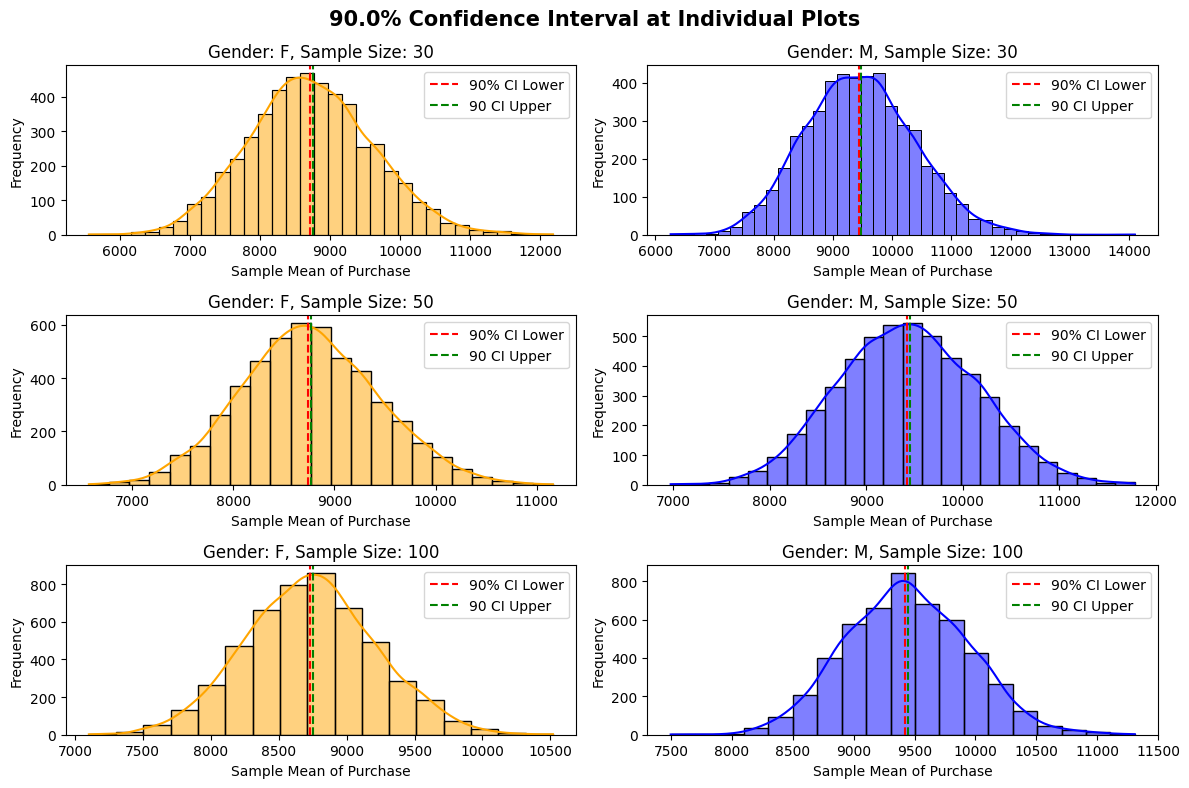

In [24]:
sample_and_plot(confidence=0.90, sample_sizes=[30, 50, 100], num_samples=5000)

**Observation**

* The histograms clearly show that males (blue histograms) generally have higher mean purchases compared to females (orange histograms) across all sample sizes. The centers (mean values) of the male histograms are consistently positioned at higher purchase values than those of the females.
* For both genders, as the sample size increases from 30 to 100, the histograms become taller and narrower. This is indicative of reduced variability in the sample means, a central concept in the Central Limit Theorem. Larger sample sizes provide a more accurate estimation of the population mean, as reflected by the decrease in the spread of sample means.
* The 90% confidence intervals narrow as the sample size increases, which is consistent with the statistical principle that larger samples provide more precise estimates of the population parameters. For example, the confidence interval is tighter in the sample size of 100 compared to 30 for both genders.
* For the female histograms, the confidence intervals are centered around lower mean values than those of the males, further highlighting the difference in spending between genders.

**CLT @90% confidence level for Gender Vs Purchase at increasing sample size**

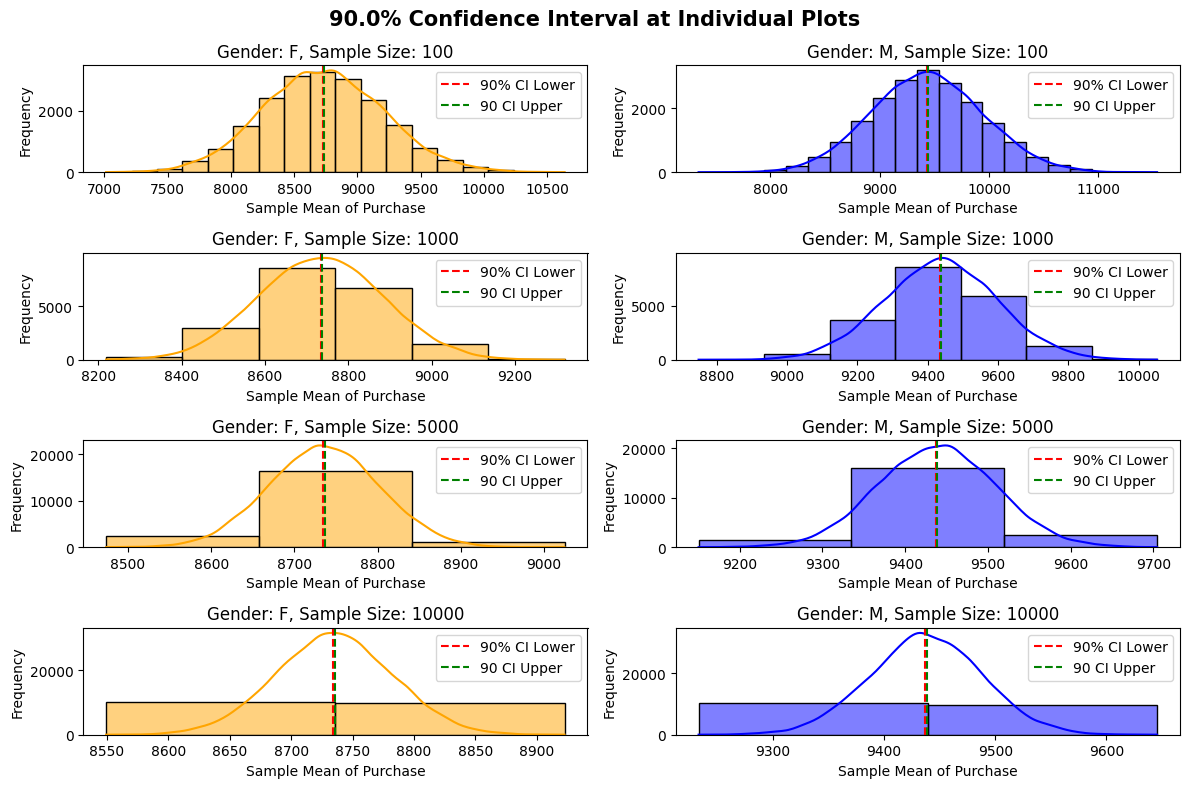

In [25]:
sample_and_plot(confidence=0.90, sample_sizes=[100, 1000, 5000, 10000], num_samples=20000)

**Observation**

* As the sample size and the number of samples increase, the distribution of sample means for both genders becomes more normalized. This is evident from the bell-shaped curves becoming more pronounced and symmetric, especially noticeable in larger samples.
* The width of the histograms (representing the spread of the sample means) decreases as both the sample size and the number of samples increase. This indicates a reduction in variability and an increase in the precision of the mean purchase estimates.
* Both genders show a slight shift in the mean purchases as the sample sizes and numbers of samples increase. For females, the mean appears to stabilize around a lower purchase value compared to males, who consistently show higher mean purchases. This suggests a gender difference in spending habits, with males generally spending more on average than females, a trend that remains consistent across all sample sizes tested.
* But these graphs are still not comprehensive in providing us the full picture. Let's build a more robust graphical view for analysis.


In [26]:
# calculate bootstrap confidence interval
def bootstrap_ci(data, confidence_interval):
    lower_ci = (100-confidence_interval)/2
    upper_ci = (100+confidence_interval)/2
    interval = np.percentile(data,[lower_ci, upper_ci]).round(0)
    return interval

#defining a function for plotting the visual for given confidence interval
def plot(confidence_interval):

    #setting the plot style
    fig = plt.figure(figsize = (12,6))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    num_samples = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(num_samples):

            #creating random 5000 samples of i sample size
            m_samples = np.random.choice(df_male,size = i)
            f_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(m_samples)
            female_sample_mean = np.mean(f_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{confidence_interval}%_{i}'] = male_means
        female_samples[f'{confidence_interval}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="blue" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="orange" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = bootstrap_ci(male_means, confidence_interval)
        f_range = bootstrap_ci(female_means, confidence_interval)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="red",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="green",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'size':10,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{confidence_interval}% Confidence Interval for Large Samples', size = 15, weight = 'bold')

    plt.show()

    return male_samples,female_samples

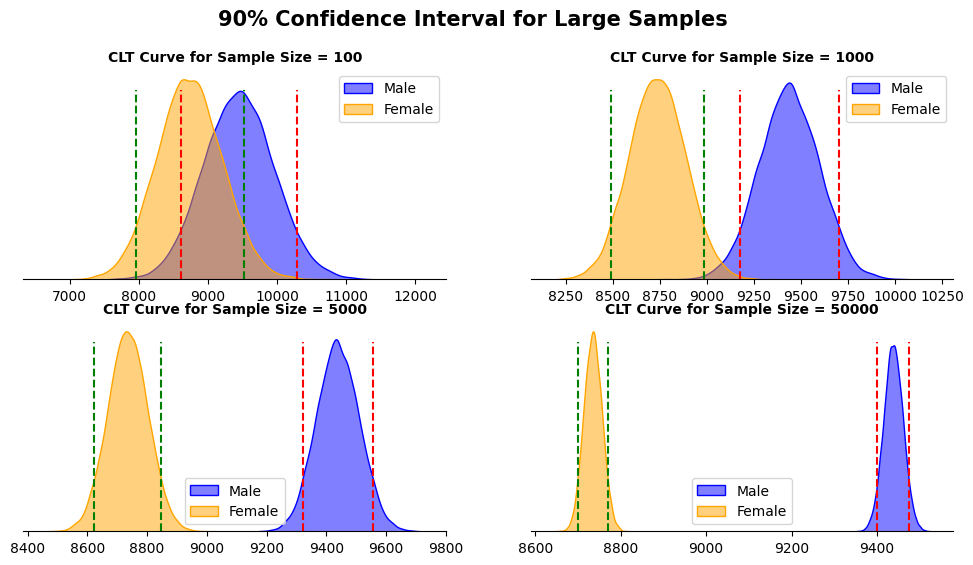

In [27]:
male_samples, female_samples = plot(90)

**Observations**

* As the sample size increases, the curves become narrower and taller, indicating a decrease in the variability of the sample means.
* The 90% confidence intervals narrow with increasing sample sizes, reflecting increased precision in estimating the population mean. This is due to the reduction in the standard error of the mean as the sample size increases.
* For larger sample sizes (e.g., 5000 and 50000), the confidence intervals are significantly tighter, showing less variability and greater confidence in the mean estimates.
* At some plots, the confidence intervals for males and females overlap, indicating that at a 90% confidence level, there might not be a statistically significant difference in the mean purchases between genders for those specific sample sizes.
* As sample size increases, the peak of the curves shifts slightly, and their peak becomes more pronounced, indicating a stronger and more reliable estimate of the mean purchase amount

**Marketing Strategies**
* Understanding that males have higher mean purchases, marketing efforts can be strategically directed to cater to male consumers with promotions, advertisements, or product placements that align with male preferences and purchasing power.

* The products that are likely driving these higher purchases among males could be stocked more robustly or diversified to enhance sales further. Similarly, for females, understanding the specific products that contribute to their spending can help in planning targeted promotions or offers.

* This data can be used to refine customer segmentation by not only gender but also by spending power, enabling personalized marketing and sales strategies.

* The confidence intervals provide a measure of risk associated with estimating average purchases. Narrower intervals at larger sample sizes reduce the risk of incorrect estimations, allowing for more confident strategic decisions.

**CLT @95% confidence level for Gender Vs Purchase at increasing sample size**

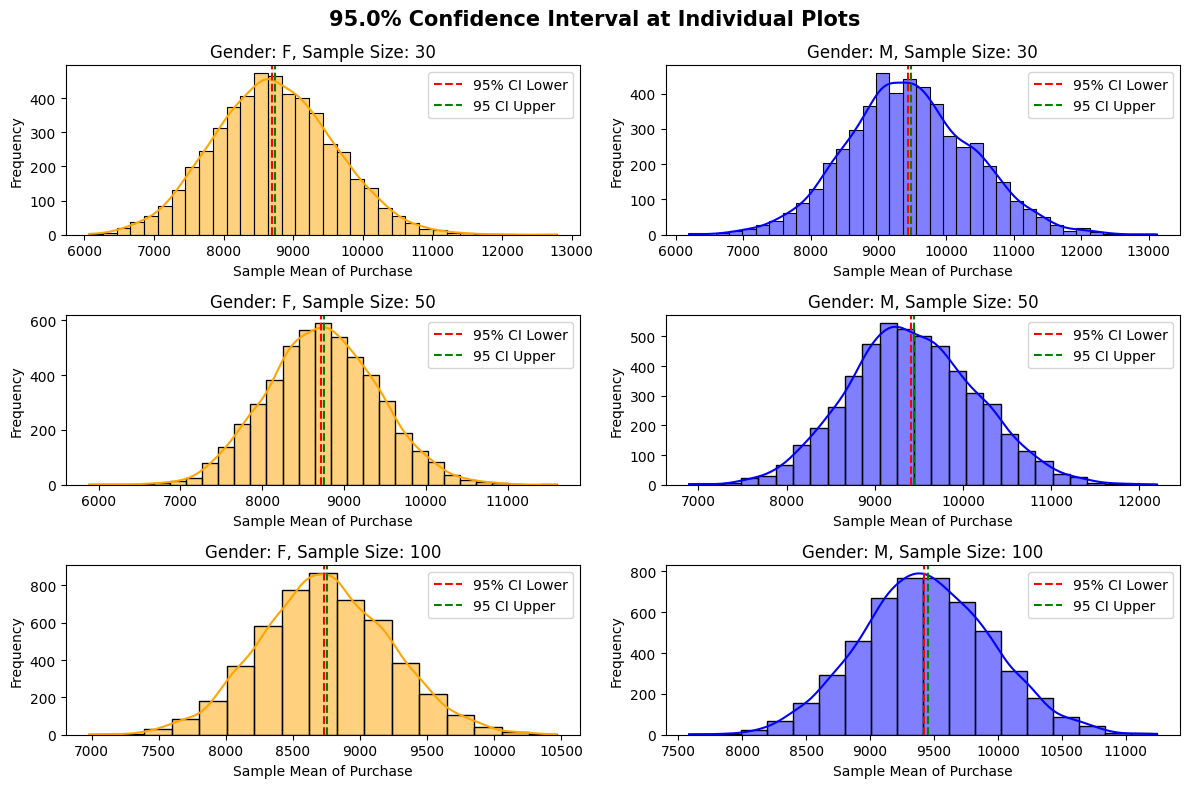

In [28]:
sample_and_plot(confidence=0.95, sample_sizes=[30, 50, 100], num_samples=5000)

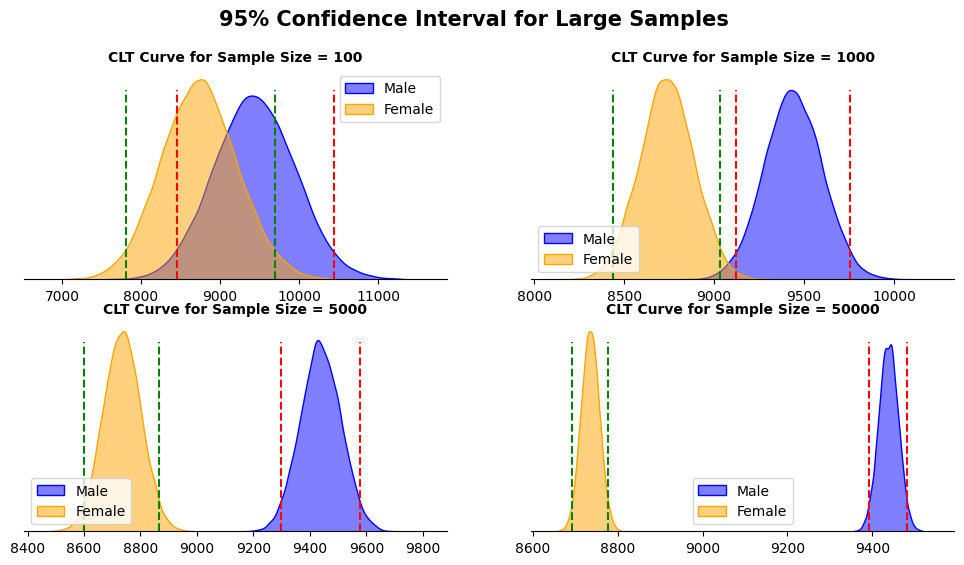

In [29]:
male_samples, female_samples = plot(95)

**CLT @99% confidence level for Gender Vs Purchase at increasing sample size**

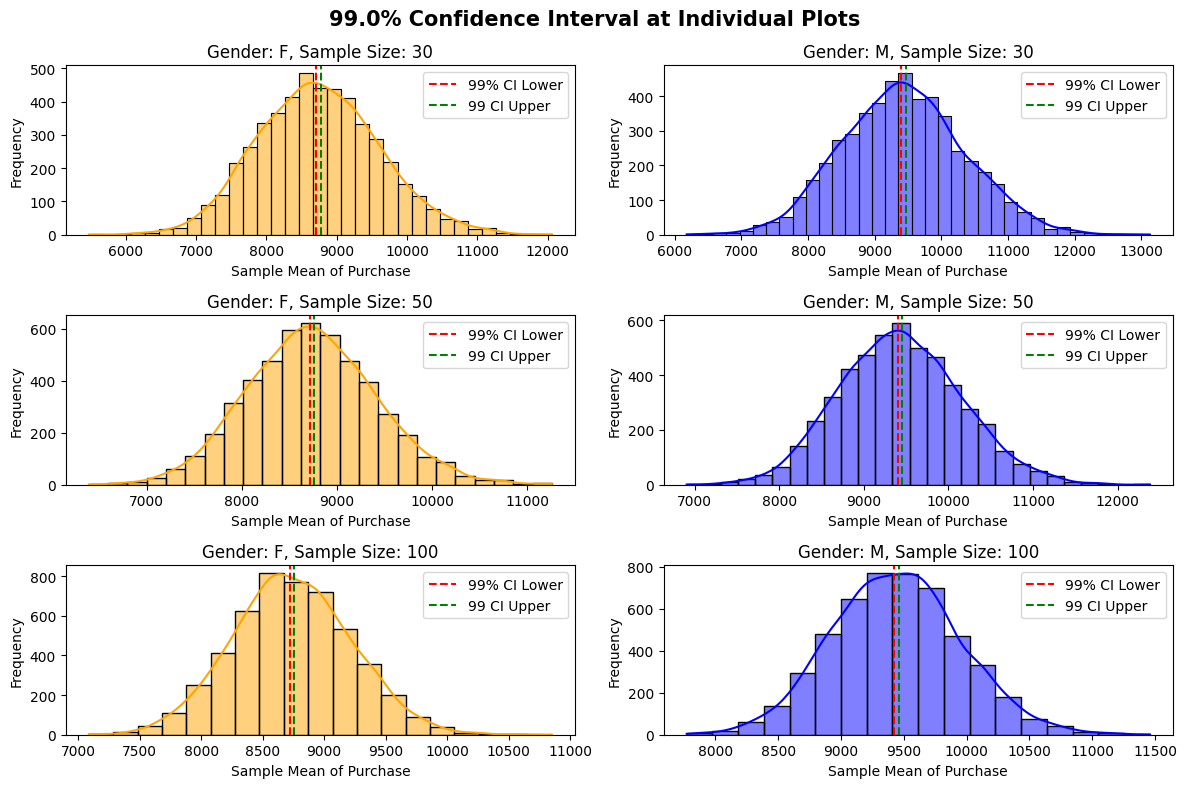

In [30]:
sample_and_plot(confidence=0.99, sample_sizes=[30, 50, 100], num_samples=5000)

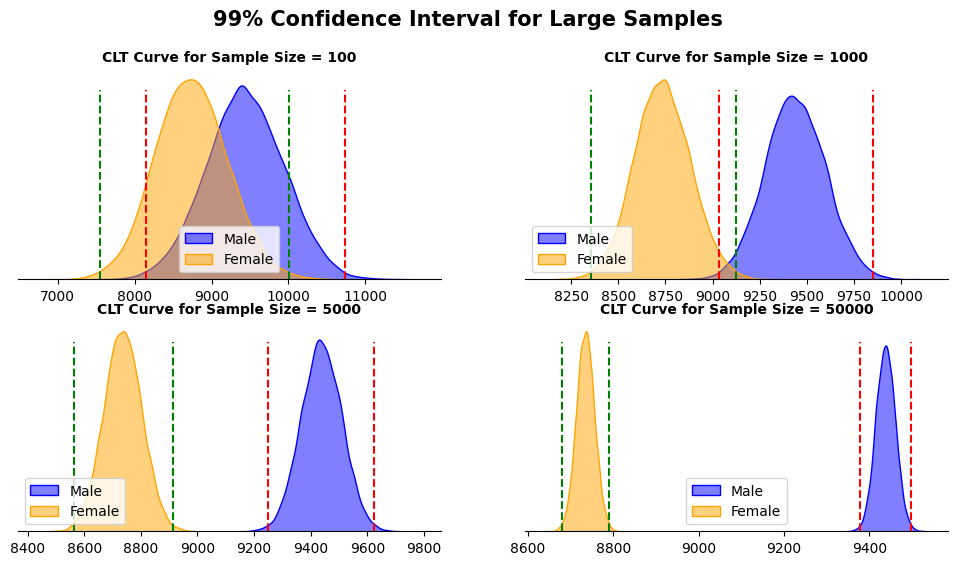

In [31]:
male_samples, female_samples = plot(99)

**Cumulative Observations**

* As the sample size increases the confidence level becomes more robust.
* Only at lower sample sizes, the confidence level overlaps. Hence we need to take lerger sample sizes.
* Men spend more money per transaction then women.

**Marital Status Vs Purchase**

In [32]:
# let's understand how marital status and purchase behaviour is observed.

# filter the purchase amount by marital status and then forward for other calculations
df_grp_mar_pur = df.groupby('Marital_Status')['Purchase'].agg(['sum', 'count']).reset_index()

# aggregate the sum in billions
df_grp_mar_pur['purchase_in_billions'] = round(df_grp_mar_pur['sum']/10**9, 2)

# purchase in the form of billions
df_grp_mar_pur['%age_purchase'] = round((df_grp_mar_pur['sum']/df_grp_mar_pur['sum'].sum())*100, 2)

# calculate per purchase amount
df_grp_mar_pur['per_purchase'] = round(df_grp_mar_pur['sum']/df_grp_mar_pur['count'])

print(df_grp_mar_pur)

  Marital_Status         sum   count  purchase_in_billions  %age_purchase  \
0      Unmarried  3008927447  324731                  3.01          59.05   
1        Married  2086885295  225337                  2.09          40.95   

   per_purchase  
0        9266.0  
1        9261.0  


In [33]:
df.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2      Unmarried                3      8370  
1                          2      Unmarried                1     15200  
2                          2      Unmarried               12      1422  
3                          2      Unmarried               12      1057  
4                         4+      Unmarried                8      7969

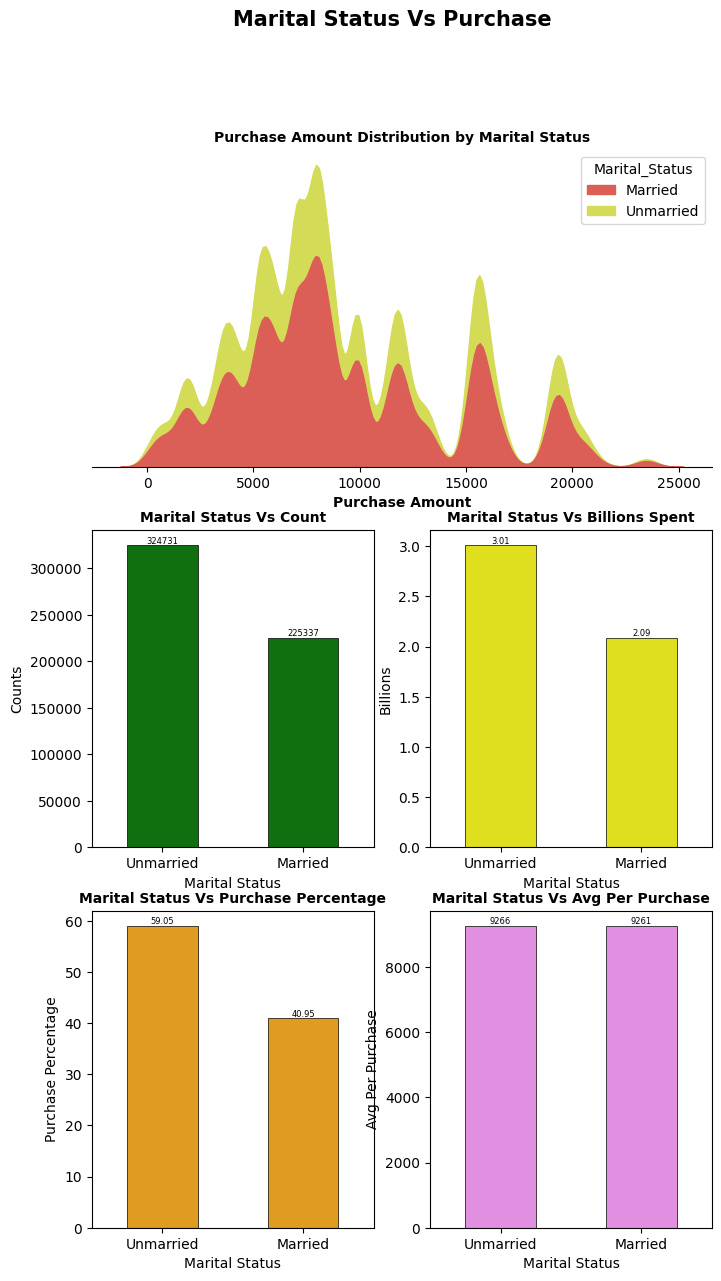

<Figure size 1500x1000 with 0 Axes>

In [34]:
# create figure and subplots manually
fig = plt.figure(figsize=(8, 14))
fig.suptitle('Marital Status Vs Purchase', fontsize=15, fontweight='bold')


# barplot marriage status count distribution
ax1 = fig.add_subplot(323)
sns.barplot(x="Marital_Status", y='count', data=df_grp_mar_pur, width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Marital Status Vs Count", fontsize=10, fontweight='bold')
ax1.set_xlabel('Marital Status', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)

# barplot marriage status vs in billions spent distribution
ax2 = fig.add_subplot(324)
sns.barplot(x="Marital_Status", y='purchase_in_billions', data=df_grp_mar_pur, width=0.5, color='yellow', linewidth=0.5, edgecolor='black', ax=ax2)
b_count(ax=ax2)
ax2.set_title("Marital Status Vs Billions Spent", fontsize=10, fontweight='bold')
ax2.set_xlabel('Marital Status', fontsize=10)
ax2.set_ylabel('Billions', fontsize=10)

# barplot marriage status in percentage spent distribution
ax3 = fig.add_subplot(325)
sns.barplot(x="Marital_Status", y='%age_purchase', data=df_grp_mar_pur, width=0.5, color='orange', linewidth=0.5, edgecolor='black', ax=ax3)
b_count(ax=ax3)
ax3.set_title("Marital Status Vs Purchase Percentage", fontsize=10, fontweight='bold')
ax3.set_xlabel('Marital Status', fontsize=10)
ax3.set_ylabel('Purchase Percentage', fontsize=10)

# barplot marriage status in avg purchase amount per transaction
ax4 = fig.add_subplot(326)
avg = round(df_grp_mar_pur['per_purchase'].mean())
sns.barplot(x="Marital_Status", y='per_purchase', data=df_grp_mar_pur, width=0.5, color='violet', linewidth=0.5, edgecolor='black', ax=ax4)
b_count(ax=ax4)
ax4.set_title("Marital Status Vs Avg Per Purchase", fontsize=10, fontweight='bold')
ax4.set_xlabel('Marital Status', fontsize=10)
ax4.set_ylabel('Avg Per Purchase', fontsize=10)

#plotting the kdeplot
ax5 = fig.add_subplot(311)
sns.kdeplot(data=df, x='Purchase', hue='Marital_Status', palette=sns.color_palette('hls'), fill=True, alpha=1, hue_order = ['Married','Unmarried'], ax=ax5)

#removing the axis lines
for s in ['top','left','right']:
    ax5.spines[s].set_visible(False)

# adjusting axis labels
ax5.set_yticks([])
ax5.set_ylabel('')
ax5.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 10)

#setting title for visual
ax5.set_title("Purchase Amount Distribution by Marital Status", fontsize=10, fontweight='bold')

plt.show()

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observations**

* Unmarried folks have bought more items in Walmart rather than Married people.
* Unmarried people have spent more than 3Bn USD in Walmart purchases and Married people have spent 2.9Bn USD
* The average expenditure per purchase is almost equal for both Married and Unmarried people.
* It is also observed that the distribution for purchse vs marital status is not normal.

**CLT on Marital Status Vs Purchase**

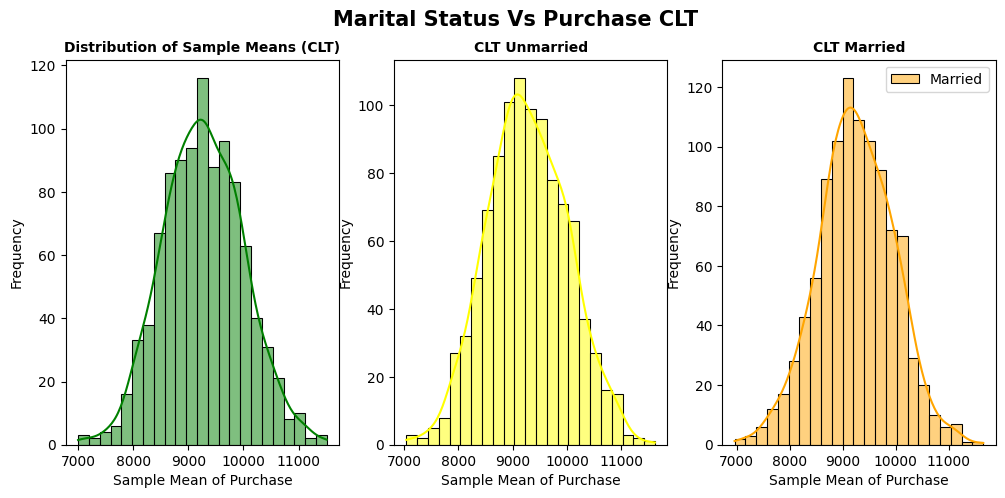

In [35]:
# assume sample, number of sampples for CLT
# Parameters

# create figure and subplots manually
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Marital Status Vs Purchase CLT', fontsize=15, fontweight='bold')


# histplot clt purchase distribution
ax1 = fig.add_subplot(131)
sample_size = 50
num_samples = 1000
sample_means = []

# Perform sampling
for _ in range(num_samples):
    sample = np.random.choice(df['Purchase'], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Plotting the distribution of sample means using seaborn
sns.histplot(sample_means, kde=True, color='green', binwidth=200, ax=ax1)
ax1.set_title("Distribution of Sample Means (CLT)", fontsize=10, fontweight='bold')
ax1.set_xlabel('Sample Mean of Purchase', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

# for marital status we need to calculate separate means for married and unmarried
# Initialize dictionaries to store sample means
sample_means = {'Married': [], 'Unmarried': []}

# Perform sampling for each status
for status in ['Married', 'Unmarried']:
    # Filter the dataframe by gender
    status_data = df[df['Marital_Status'] == status]['Purchase']
    for _ in range(num_samples):
        sample = np.random.choice(status_data, size=sample_size, replace=True)
        sample_means[status].append(np.mean(sample))

# histplot clt purchase distribution
ax2 = fig.add_subplot(132)

# Plotting the distribution of sample means using seaborn
sns.histplot(sample_means['Unmarried'], color='yellow', kde=True, label='Unmarried', binwidth=200, ax=ax2)
ax2.set_title("CLT Unmarried", fontsize=10, fontweight='bold')
ax2.set_xlabel('Sample Mean of Purchase', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

# histplot clt purchase distribution
ax3 = fig.add_subplot(133)

# Plotting the distribution of sample means using seaborn
sns.histplot(sample_means['Married'], color='orange', kde=True, label='Married', binwidth=200, ax=ax3)
ax3.set_title("CLT Married", fontsize=10, fontweight='bold')
ax3.set_xlabel('Sample Mean of Purchase', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)

plt.legend()
plt.show()

**Observation**

* From our above observation its seen that the Sample mean of purchase does follow a normal distribution.
* But we cannot conclude any impact of marital status on the above distribution.
* While plotting for married and unmarried CLT, it is observed that the purchase patterns do follow normal distribution for a random sample size.
* But this sample length does not do justice. We need to increase the sample size further and build an analysis for 90%, 95%, 99% confidence level.

In [36]:
# function 1 for smaller sample size
# Function to calculate confidence intervals
def confidence_interval(data, confidence):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    interval = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return (mean - interval, mean + interval)

# Perform sampling for each status and sample size
def sample_and_plot_mar_vs_purchase(confidence, sample_sizes, num_samples):
  results = []
  for sample_size in sample_sizes:
      for status in ['Unmarried', 'Married']:
          status_data = df[df['Marital_Status'] == status]['Purchase']
          sample_means = []
          for _ in range(num_samples):
              sample = np.random.choice(status_data, size=sample_size, replace=True)
              sample_means.append(np.mean(sample))
          ci_lower, ci_upper = confidence_interval(sample_means, confidence)
          results.append({
              'Status': status,
              'Sample Size': sample_size,
              'Sample Means': sample_means,
              'CI Lower': ci_lower,
              'CI Upper': ci_upper
          })


  # Plotting the results
  plt.figure(figsize=(12, 8))
  plt.suptitle(f'{str(confidence*100)}% Confidence Interval with Independent Plots', fontsize=15, fontweight='bold')
  colors = {'Unmarried': 'orange', 'Married': 'blue'}
  for i, result in enumerate(results):
      plt.subplot(len(sample_sizes), 2, i + 1)
      sns.histplot(result['Sample Means'], kde=True, color=colors[result['Status']], binwidth=200)
      plt.axvline(x=result['CI Lower'], color='red', linestyle='--', label=f'{str(int(confidence*100))}% CI Lower')
      plt.axvline(x=result['CI Upper'], color='green', linestyle='--', label=f'{str(int(confidence*100))} CI Upper')
      plt.title(f'Status: {result["Status"]}, Sample Size: {result["Sample Size"]}')
      plt.xlabel('Sample Mean of Purchase')
      plt.ylabel('Frequency')
      plt.legend()

  plt.tight_layout()
  plt.show()

In [37]:
# function 2 for larger data set
# calculate bootstrap confidence interval
def bootstrap_ci(data, confidence_interval):
    lower_ci = (100-confidence_interval)/2
    upper_ci = (100+confidence_interval)/2
    interval = np.percentile(data,[lower_ci, upper_ci]).round(0)
    return interval

# defining a function for plotting the visual for given confidence interval
def plot_mar_vs_purchase(confidence_interval):

    # setting the plot style
    fig = plt.figure(figsize = (12,6))
    gs = fig.add_gridspec(2,2)

    # creating separate data frames for each status
    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    # sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    # number of samples to be taken from purchase amount
    num_samples = 20000

    married_samples = {}
    unmarried_samples = {}

    for i,x,y in sample_sizes:
        married_means = [] # list for collecting the means of married sample
        unmarried_means = [] # list for collecting the means of unmarried sample

        for j in range(num_samples):

            #creating random 5000 samples of i sample size
            m_samples = np.random.choice(df_married,size = i)
            u_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(m_samples)
            unmarried_sample_mean = np.mean(u_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        #storing the above sample generated
        male_samples[f'{confidence_interval}%_{i}'] = married_means
        female_samples[f'{confidence_interval}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'married_means',color ="red" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="gold" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = bootstrap_ci(married_means, confidence_interval)
        f_range = bootstrap_ci(unmarried_means, confidence_interval)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="blue",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="green",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'size':10,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{confidence_interval}% Confidence Interval for Large Samples', size = 15, weight = 'bold')

    plt.show()

    return male_samples,female_samples

**CLT @90% confidence level for Marital Status Vs Purchase at increasing sample size**

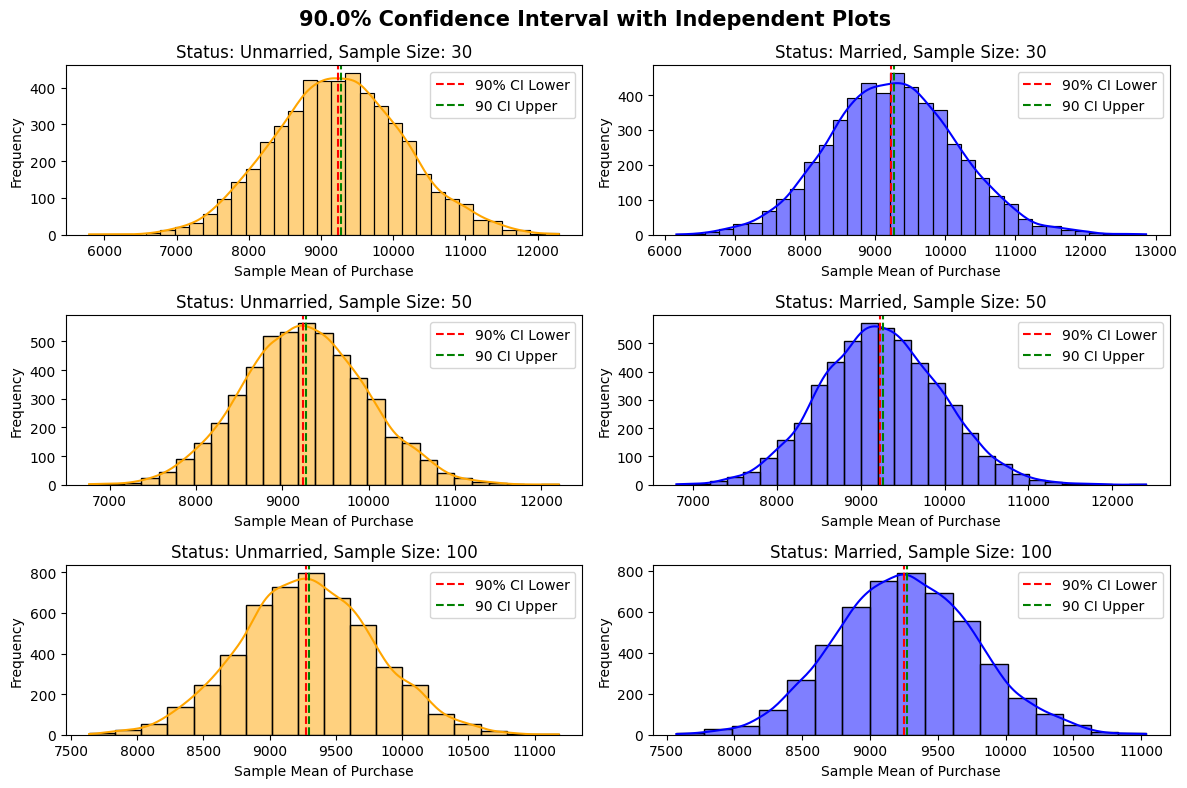

In [38]:
sample_and_plot_mar_vs_purchase(confidence=0.90, sample_sizes=[30, 50, 100], num_samples=5000)

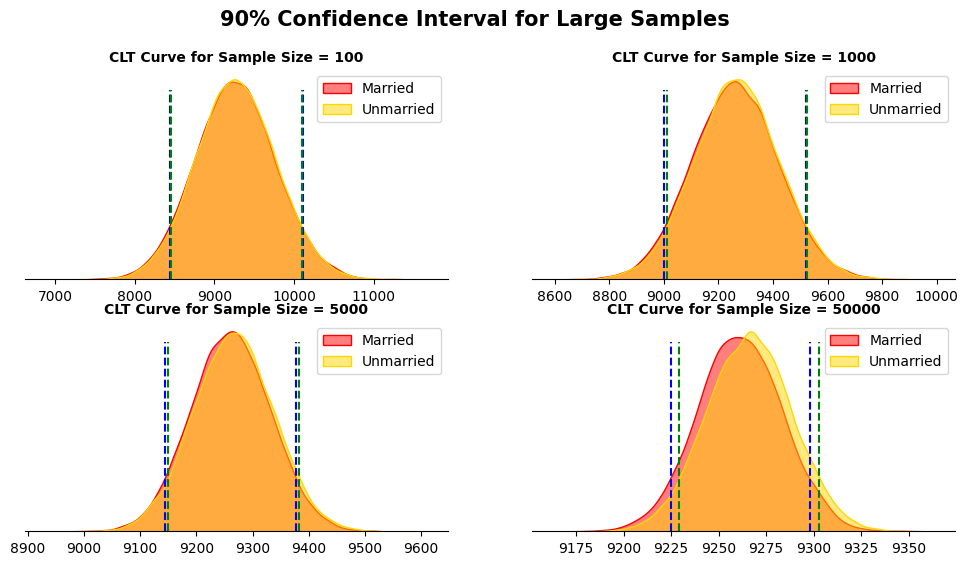

In [39]:
married_samples, unmarried_samples = plot_mar_vs_purchase(90)

**CLT @95% confidence level for Marital Status Vs Purchase at increasing sample size**

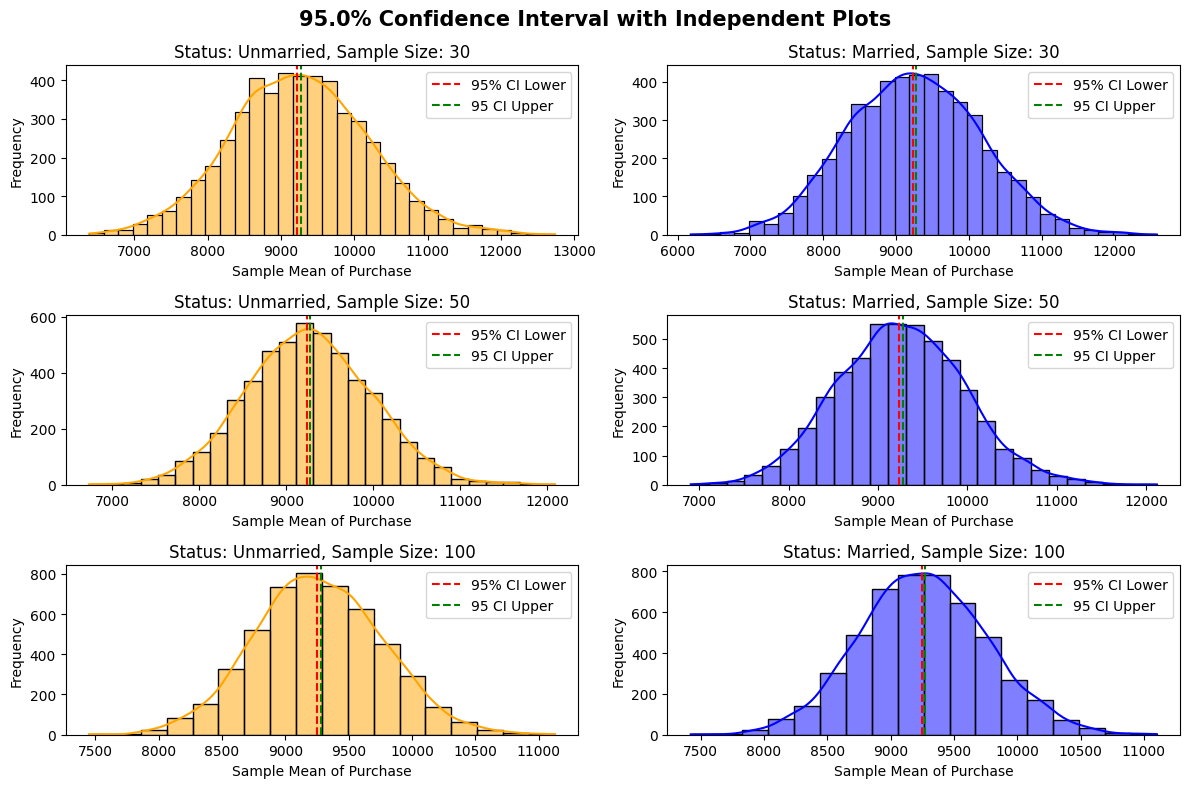

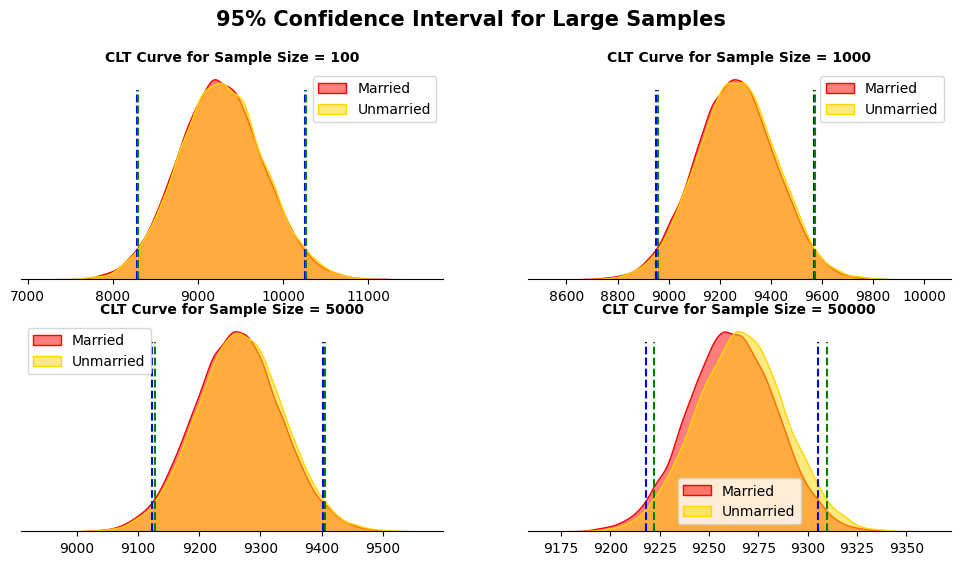

In [40]:
sample_and_plot_mar_vs_purchase(confidence=0.95, sample_sizes=[30, 50, 100], num_samples=5000)
married_samples, unmarried_samples = plot_mar_vs_purchase(95)

**CLT @99% confidence level for Marital Status Vs Purchase at increasing sample size**

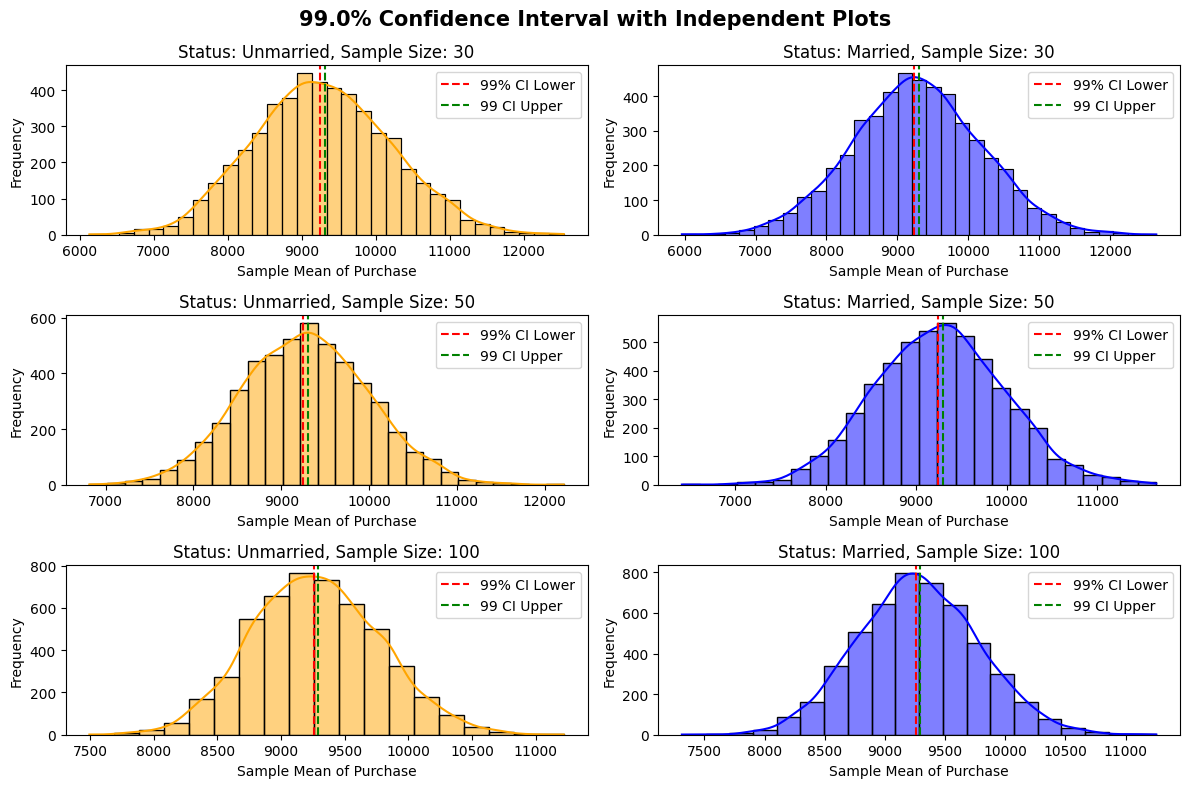

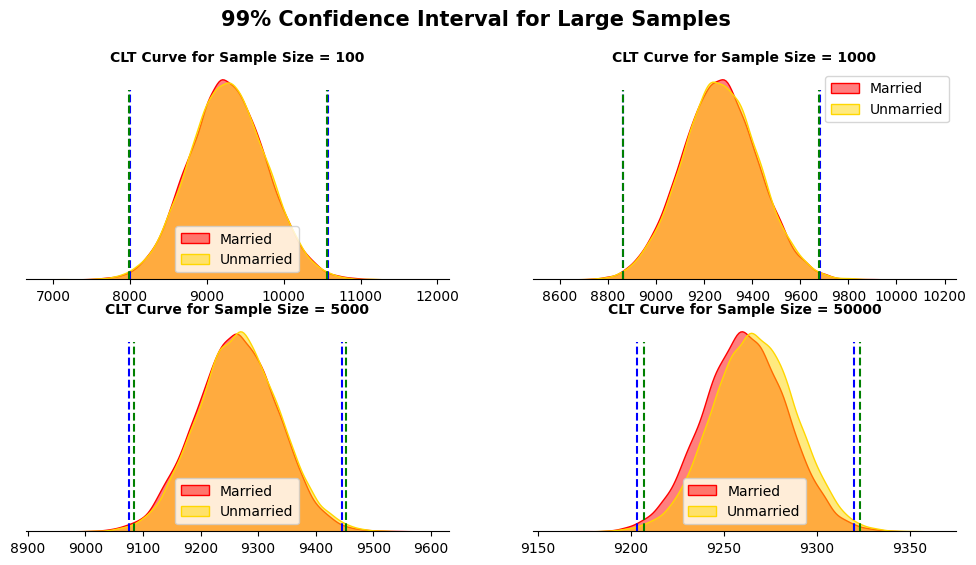

In [41]:
sample_and_plot_mar_vs_purchase(confidence=0.99, sample_sizes=[30, 50, 100], num_samples=5000)
married_samples, unmarried_samples = plot_mar_vs_purchase(99)

**Observations**

* There is a significant overlap of both parameters over a wide range of samples. Hence there is no statistical difference between the purchase power of both Married and Unmarried couples.
* Both married and unmarried people spend similar amount per transaction.

**Marketing Strategy**
* Understanding that both groups spend equally, marketers can tailor campaigns and promotions to appeal both groups, perhaps focusing on products that cater to shared needs or household usage.

**Age Vs Purchase**


In [42]:
# let's understand how age and purchase behaviour is observed.

# filter the purchase amount by age and then forward for other calculations
df_grp_age_pur = df.groupby('Age')['Purchase'].agg(['sum', 'count']).reset_index()

# aggregate the sum in billions
df_grp_age_pur['purchase_in_billions'] = round(df_grp_age_pur['sum']/10**9, 2)

# purchase in the form of billions
df_grp_age_pur['%age_purchase'] = round((df_grp_age_pur['sum']/df_grp_age_pur['sum'].sum())*100, 2)

# calculate per purchase amount
df_grp_age_pur['per_purchase'] = round(df_grp_age_pur['sum']/df_grp_age_pur['count'])

print(df_grp_age_pur)

     Age         sum   count  purchase_in_billions  %age_purchase  \
0   0-17   134913183   15102                  0.13           2.65   
1  18-25   913848675   99660                  0.91          17.93   
2  26-35  2031770578  219587                  2.03          39.87   
3  36-45  1026569884  110013                  1.03          20.15   
4  46-50   420843403   45701                  0.42           8.26   
5  51-55   367099644   38501                  0.37           7.20   
6    55+   200767375   21504                  0.20           3.94   

   per_purchase  
0        8933.0  
1        9170.0  
2        9253.0  
3        9331.0  
4        9209.0  
5        9535.0  
6        9336.0  


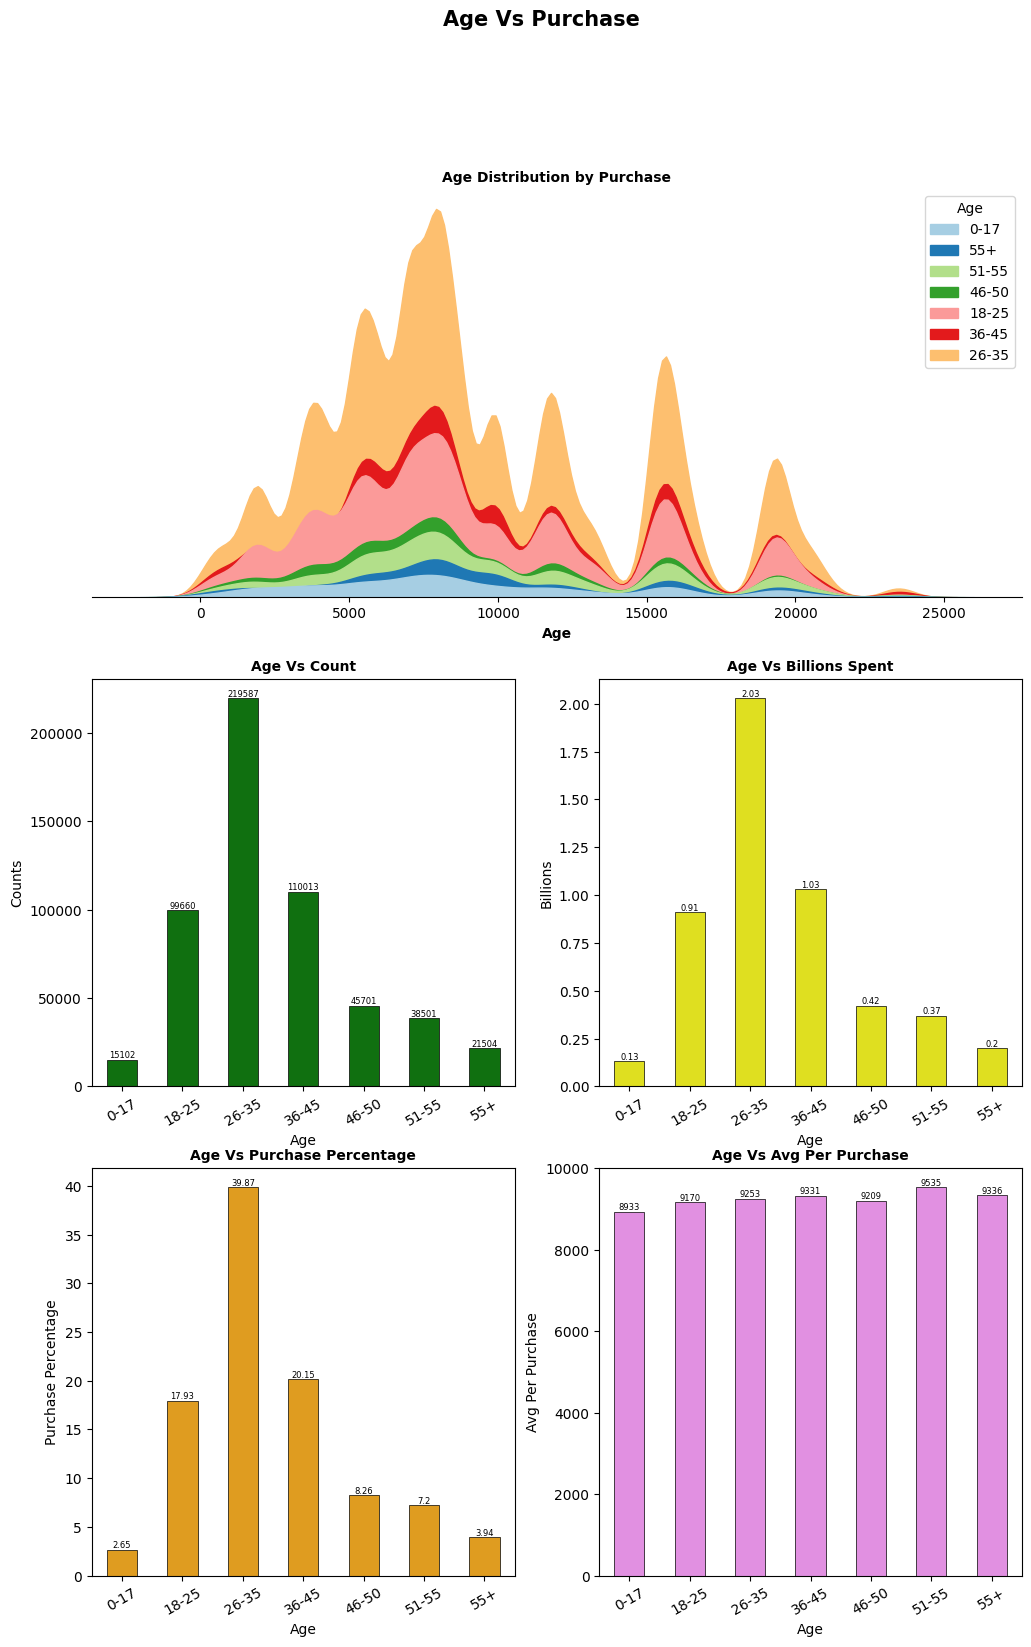

<Figure size 1500x1000 with 0 Axes>

In [43]:
# create figure and subplots manually
fig = plt.figure(figsize=(12, 18))
fig.suptitle('Age Vs Purchase', fontsize=15, fontweight='bold')


# barplot age count distribution
ax1 = fig.add_subplot(323)
sns.barplot(x="Age", y='count', data=df_grp_age_pur, width=0.5, color='green', linewidth=0.5, edgecolor='black', ax=ax1)
b_count(ax=ax1)
ax1.set_title("Age Vs Count", fontsize=10, fontweight='bold')
ax1.set_xlabel('Age', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)
plt.xticks(rotation=30)

# barplot age vs in billions spent distribution
ax2 = fig.add_subplot(324)
sns.barplot(x="Age", y='purchase_in_billions', data=df_grp_age_pur, width=0.5, color='yellow', linewidth=0.5, edgecolor='black', ax=ax2)
b_count(ax=ax2)
ax2.set_title("Age Vs Billions Spent", fontsize=10, fontweight='bold')
ax2.set_xlabel('Age', fontsize=10)
ax2.set_ylabel('Billions', fontsize=10)
plt.xticks(rotation=30)

# barplot age in percentage spent distribution
ax3 = fig.add_subplot(325)
sns.barplot(x="Age", y='%age_purchase', data=df_grp_age_pur, width=0.5, color='orange', linewidth=0.5, edgecolor='black', ax=ax3)
b_count(ax=ax3)
ax3.set_title("Age Vs Purchase Percentage", fontsize=10, fontweight='bold')
ax3.set_xlabel('Age', fontsize=10)
ax3.set_ylabel('Purchase Percentage', fontsize=10)
plt.xticks(rotation=30)

# barplot age in avg purchase amount per transaction
ax4 = fig.add_subplot(326)
avg = round(df_grp_age_pur['per_purchase'].mean())
sns.barplot(x="Age", y='per_purchase', data=df_grp_age_pur, width=0.5, color='violet', linewidth=0.5, edgecolor='black', ax=ax4)
b_count(ax=ax4)
ax4.set_title("Age Vs Avg Per Purchase", fontsize=10, fontweight='bold')
ax4.set_xlabel('Age', fontsize=10)
ax4.set_ylabel('Avg Per Purchase', fontsize=10)
plt.xticks(rotation=30)

#plotting the kdeplot
ax5 = fig.add_subplot(311)
sns.kdeplot(data=df, x='Purchase', hue='Age', palette=sns.color_palette('Paired'), fill=True, hue_order = ['0-17','55+', '51-55', '46-50', '18-25', '36-45', '26-35'], alpha=1, ax=ax5)

#removing the axis lines
for s in ['top','left','right']:
    ax5.spines[s].set_visible(False)

# adjusting axis labels
ax5.set_yticks([])
ax5.set_ylabel('')
ax5.set_xlabel('Age',fontweight = 'bold',fontsize = 10)

#setting title for visual
ax5.set_title("Age Distribution by Purchase", fontsize=10, fontweight='bold')

plt.show()

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation**

* It is observed that the data is not normally distributed.
* Age group 26-35 has the highest amount of purchases at almost 40%
* The spending amount per purchase is nearly symmetrical for all age groups.

**CLT on Age Vs Purchase**

In [44]:
df.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2      Unmarried                3      8370  
1                          2      Unmarried                1     15200  
2                          2      Unmarried               12      1422  
3                          2      Unmarried               12      1057  
4                         4+      Unmarried                8      7969

<Figure size 1500x1000 with 0 Axes>

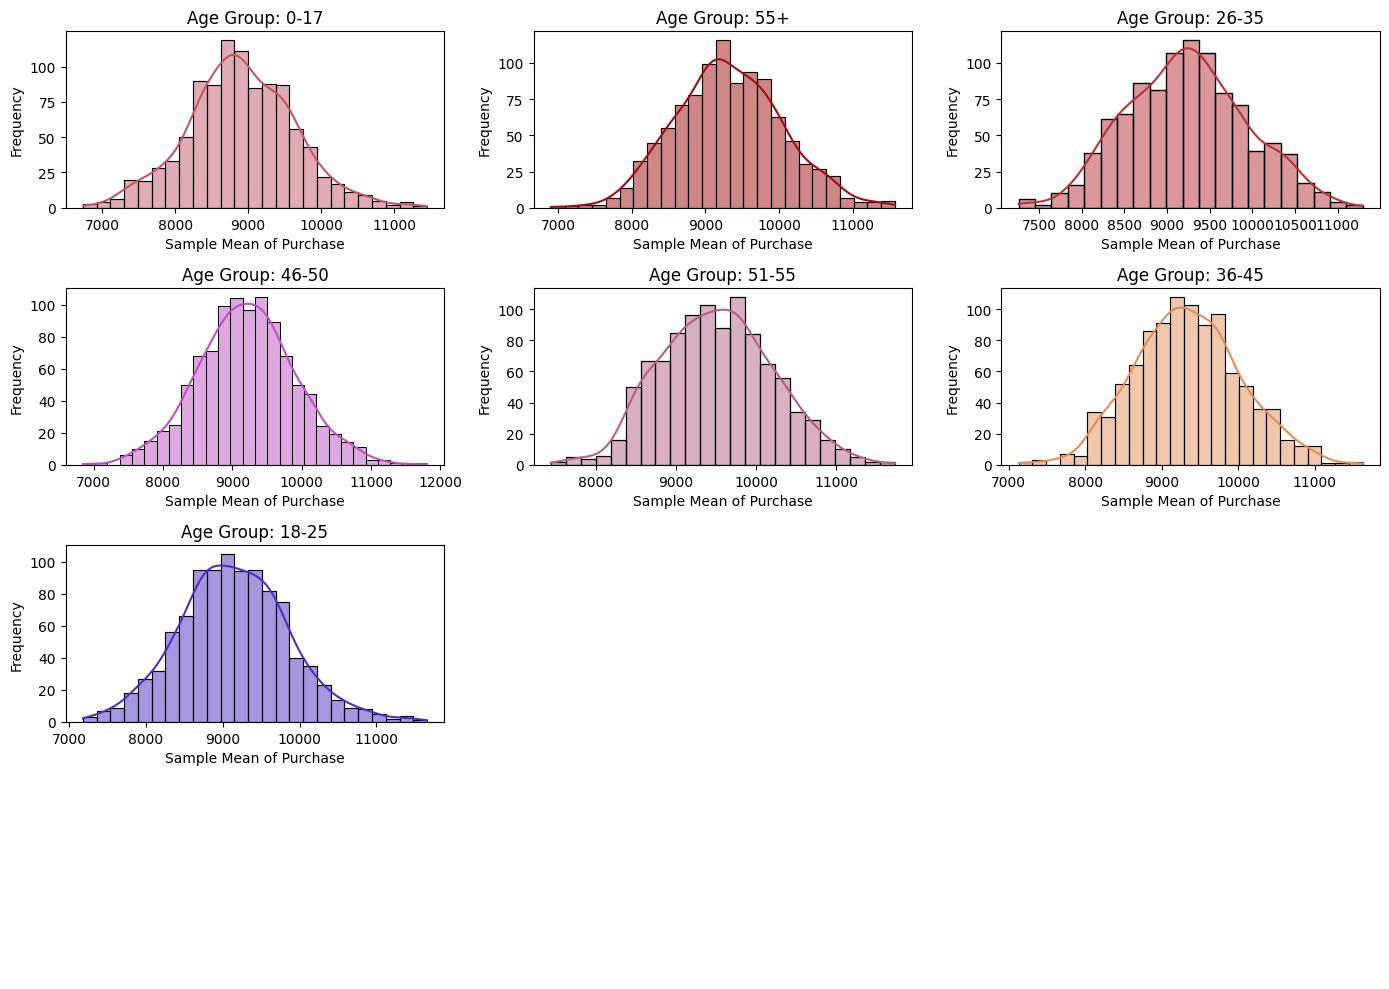

In [45]:
# assume sample, number of sampples for CLT
plt.suptitle('Age Vs Purchase CLT', fontsize=15, fontweight='bold')


# histplot clt purchase distribution
ax1 = fig.add_subplot(241)
sample_size = 50
num_samples = 1000
sample_means = []

# age groups
age_groups = df['Age'].unique()

fig, axes = plt.subplots(nrows=int(np.ceil(len(age_groups)/2)), ncols=3, figsize=(14, 10))
axes = axes.flatten()

# perform sampling and plotting
for idx, age in enumerate(age_groups):
    age_data = df[df['Age'] == age]['Purchase'].values
    sample_means = []
    for _ in range(num_samples):
        if len(age_data) >= sample_size:
            sample = np.random.choice(age_data, size=sample_size, replace=True)
            sample_means.append(np.mean(sample))

    # plotting in a subplot
    sns.histplot(sample_means, kde=True, ax=axes[idx], color=np.random.rand(3,))
    axes[idx].set_title(f'Age Group: {age}')
    axes[idx].set_xlabel('Sample Mean of Purchase')
    axes[idx].set_ylabel('Frequency')

for i in range(len(age_groups), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**

* It is observed that the data of all age groups means are individually following a normal distribution.
* It is also observed that there is a lot of overlap amongst the age groups.



In [46]:
# function 1 for smaller sample size
# function to calculate confidence intervals
def confidence_interval(data, confidence):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    interval = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return (mean - interval, mean + interval)

# ferform sampling and plotting, fixed for subplot layout
def sample_and_plot_age_vs_purchase(confidence, sample_sizes, num_samples):
    age_groups = ['0-17', '55+', '51-55', '46-50', '18-25', '36-45', '26-35']
    results = []
    for sample_size in sample_sizes:
        for age in age_groups:
            age_data = df[df['Age'] == age]['Purchase']
            sample_means = [np.mean(np.random.choice(age_data, size=sample_size, replace=True)) for _ in range(num_samples) if len(age_data) >= sample_size]
            if sample_means:  # Ensure there are sample means to process
                ci_lower, ci_upper = confidence_interval(sample_means, confidence)
                results.append({
                    'Age': age,
                    'Sample Size': sample_size,
                    'Sample Means': sample_means,
                    'CI Lower': ci_lower,
                    'CI Upper': ci_upper
                })

    num_plots = len(sample_sizes) * len(age_groups)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  # calculate rows needed

    # flotting the results
    plt.figure(figsize=(12, num_rows * 4))  # adjust figure size dynamically based on rows
    plt.suptitle(f'{confidence*100:.0f}% Confidence Interval for Age Groups', fontsize=15, fontweight='bold')

    colors = sns.color_palette("hls", len(age_groups))
    age_color_map = dict(zip(age_groups, colors))

    for i, result in enumerate(results):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(result['Sample Means'], kde=True, color=age_color_map[result['Age']], binwidth=200)
        plt.axvline(result['CI Lower'], color='red', linestyle='--', label=f'{confidence*100:.0f}% CI Lower')
        plt.axvline(result['CI Upper'], color='green', linestyle='--', label=f'{confidence*100:.0f}% CI Upper')
        plt.title(f'Age: {result["Age"]}, Sample Size: {result["Sample Size"]}')
        plt.xlabel('Sample Mean of Purchase')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [47]:
# function 2 for large samples
def plot_age_vs_purchase(confidence_interval):

    # setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    # creating separate data frames

    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']


    # sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(1000,1),(5000,2),(50000,3)]

    # number of samples to be taken from purchase amount
    num_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(num_samples):

            # creating random 5000 samples of i sample size
            num_samples_1 = np.random.choice(df_1,size = i)
            num_samples_2 = np.random.choice(df_2,size = i)
            num_samples_3 = np.random.choice(df_3,size = i)
            num_samples_4 = np.random.choice(df_4,size = i)
            num_samples_5 = np.random.choice(df_5,size = i)
            num_samples_6 = np.random.choice(df_6,size = i)
            num_samples_7 = np.random.choice(df_7,size = i)

            # calculating mean of those samples
            sample_mean_1 = np.mean(num_samples_1)
            sample_mean_2 = np.mean(num_samples_2)
            sample_mean_3 = np.mean(num_samples_3)
            sample_mean_4 = np.mean(num_samples_4)
            sample_mean_5 = np.mean(num_samples_5)
            sample_mean_6 = np.mean(num_samples_6)
            sample_mean_7 = np.mean(num_samples_7)

            # appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        # storing the above sample generated
        samples1[f'{confidence_interval}%_{i}'] = l1
        samples2[f'{confidence_interval}%_{i}'] = l2
        samples3[f'{confidence_interval}%_{i}'] = l3
        samples4[f'{confidence_interval}%_{i}'] = l4
        samples5[f'{confidence_interval}%_{i}'] = l5
        samples6[f'{confidence_interval}%_{i}'] = l6
        samples7[f'{confidence_interval}%_{i}'] = l7


        # creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

        # plot position
        ax = fig.add_subplot(gs[x])

        # plots
        for p,q in [('orange', '0-17'),('blue', '18-25'),('yellow', '26-35'),('green', '36-45'),('gold', '46-50'),
                 ('pink', '51-55'),('violet', '55+')]:
            sns.kdeplot(data=temp_df, x=q, color=p ,fill=True, alpha=0.5, ax=ax, label=q)


        # removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'size':10,'weight':'bold'})

        plt.legend()

    # setting title for visual
    fig.suptitle(f'{confidence_interval}% Confidence Interval for Large Samples', size = 15, weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

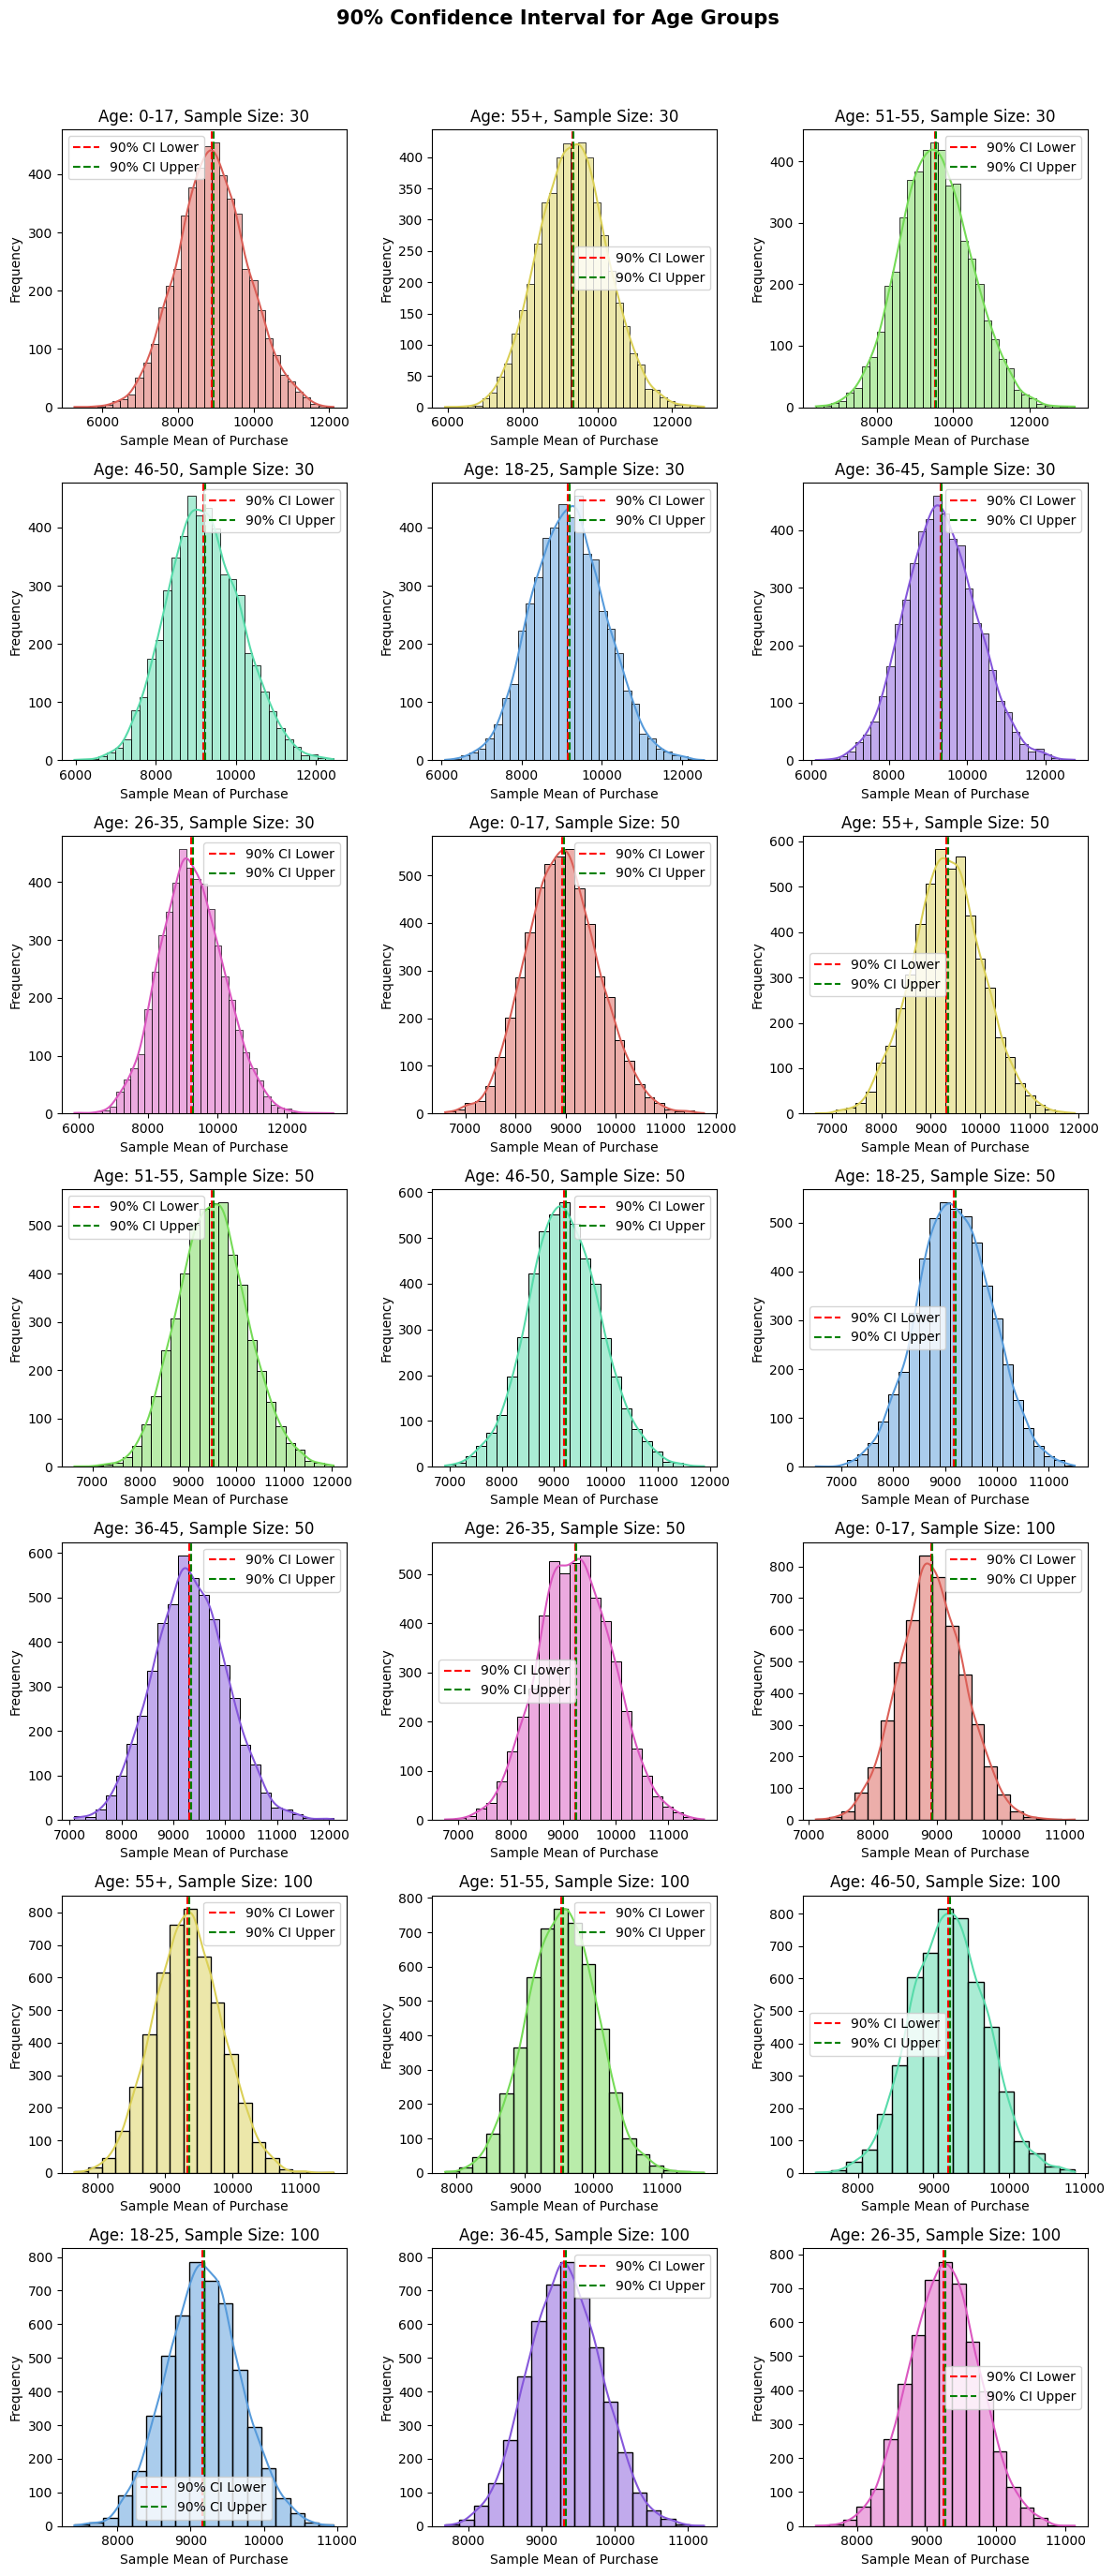

In [48]:
sample_and_plot_age_vs_purchase(confidence=0.90, sample_sizes=[30, 50, 100], num_samples=5000)

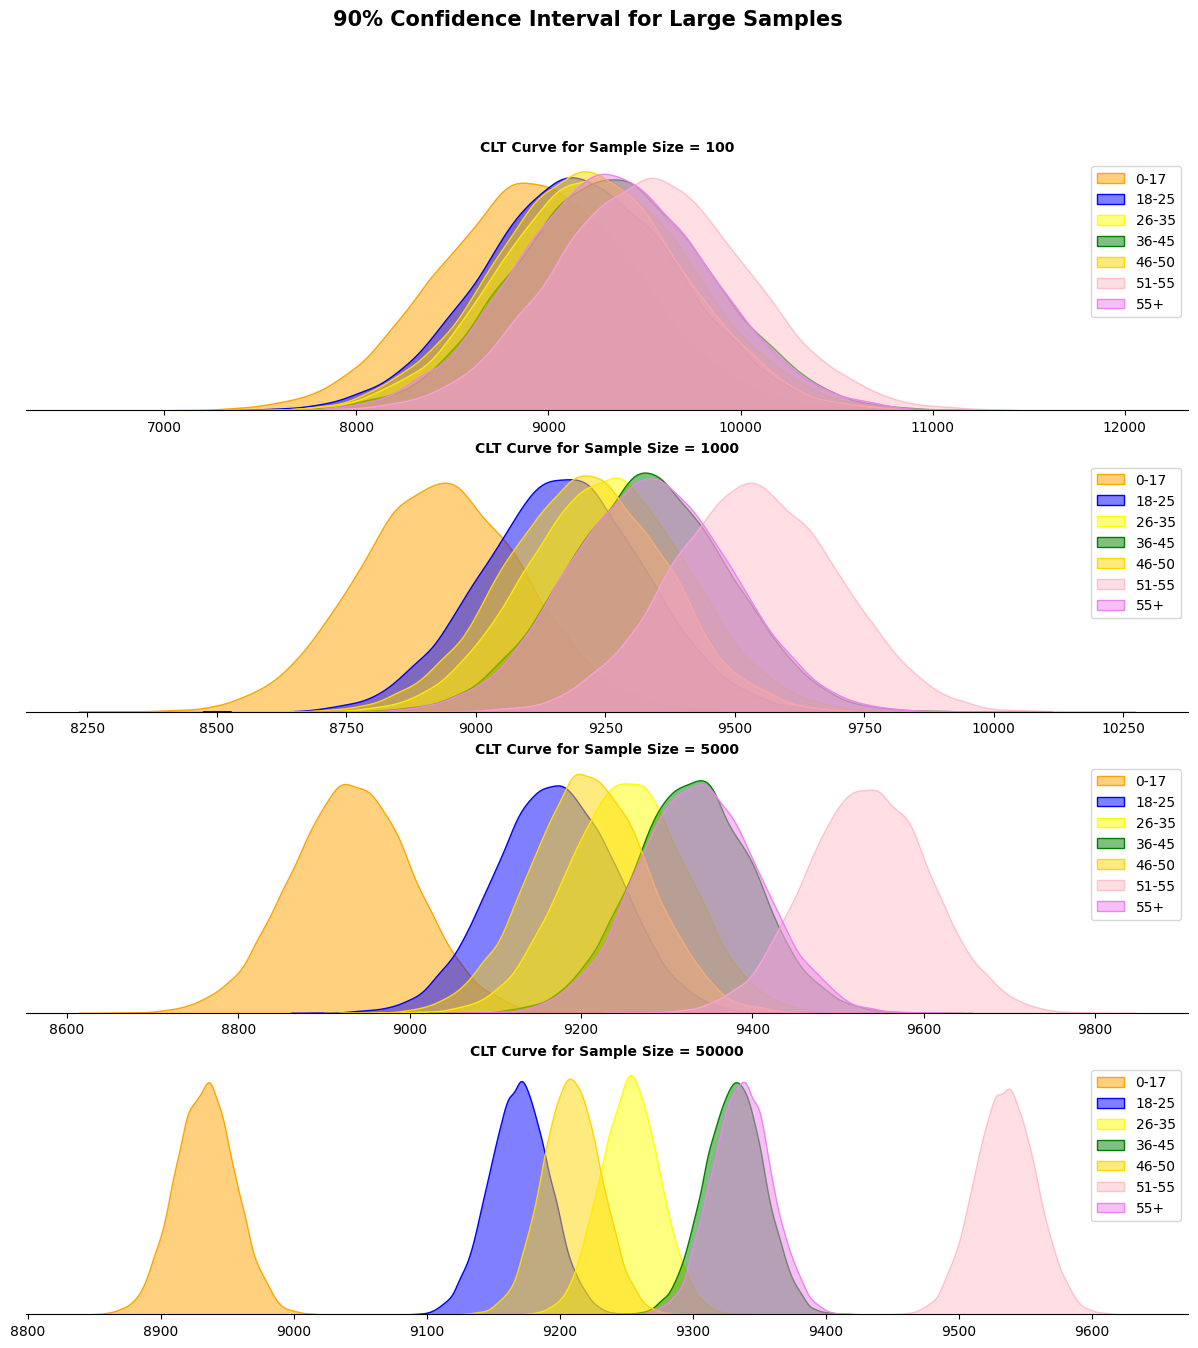

In [49]:
age_sample1,age_sample2,age_sample3,age_sample4,age_sample5,age_sample6,age_sample7 = plot_age_vs_purchase(90)

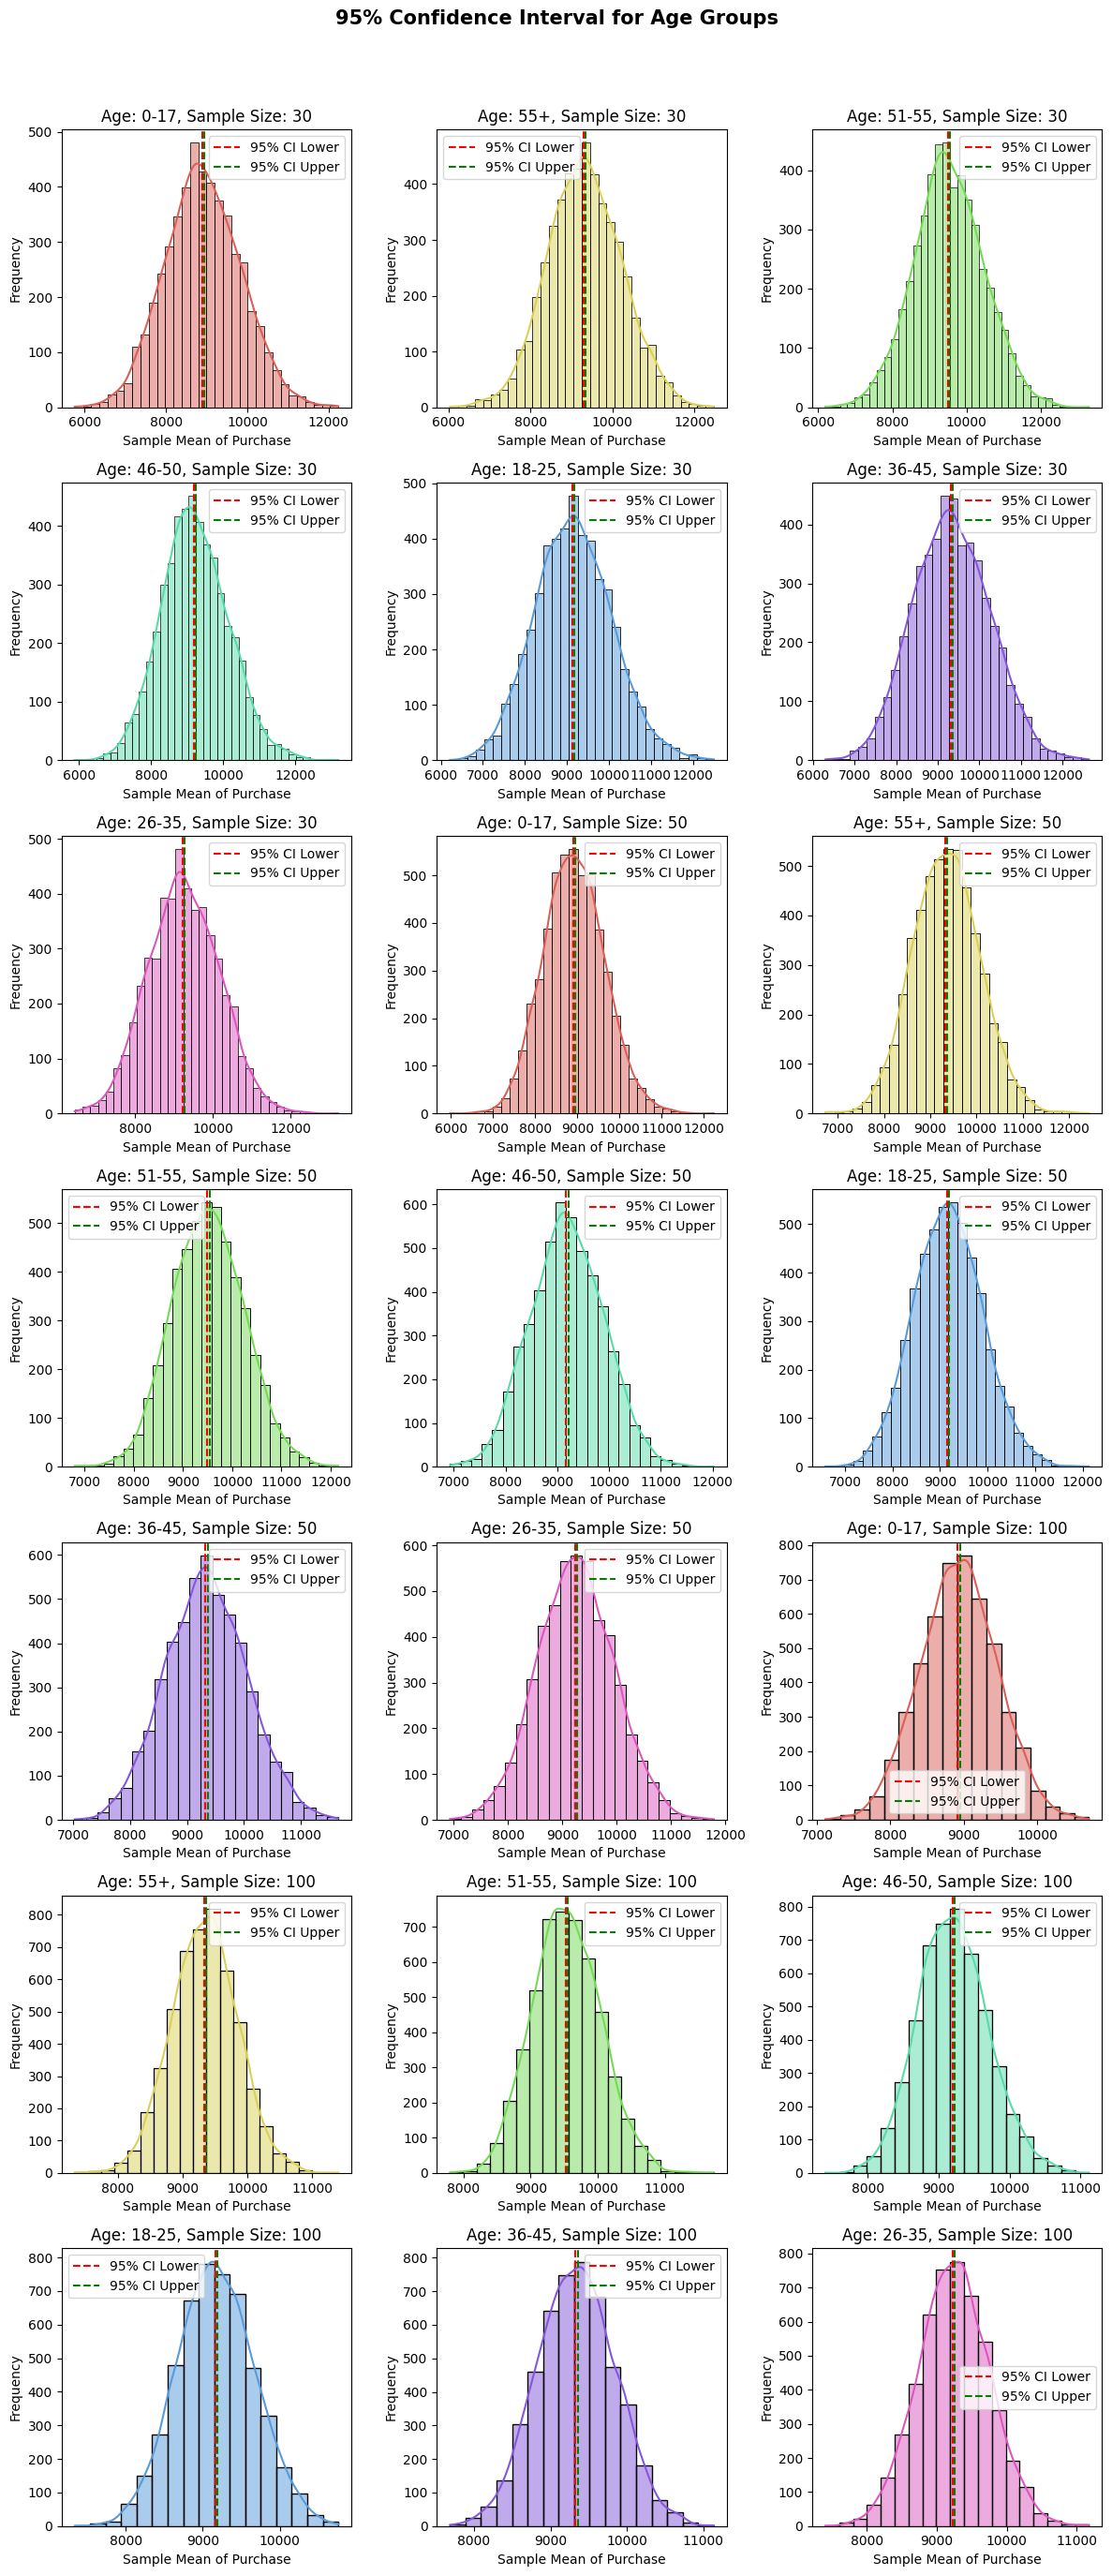

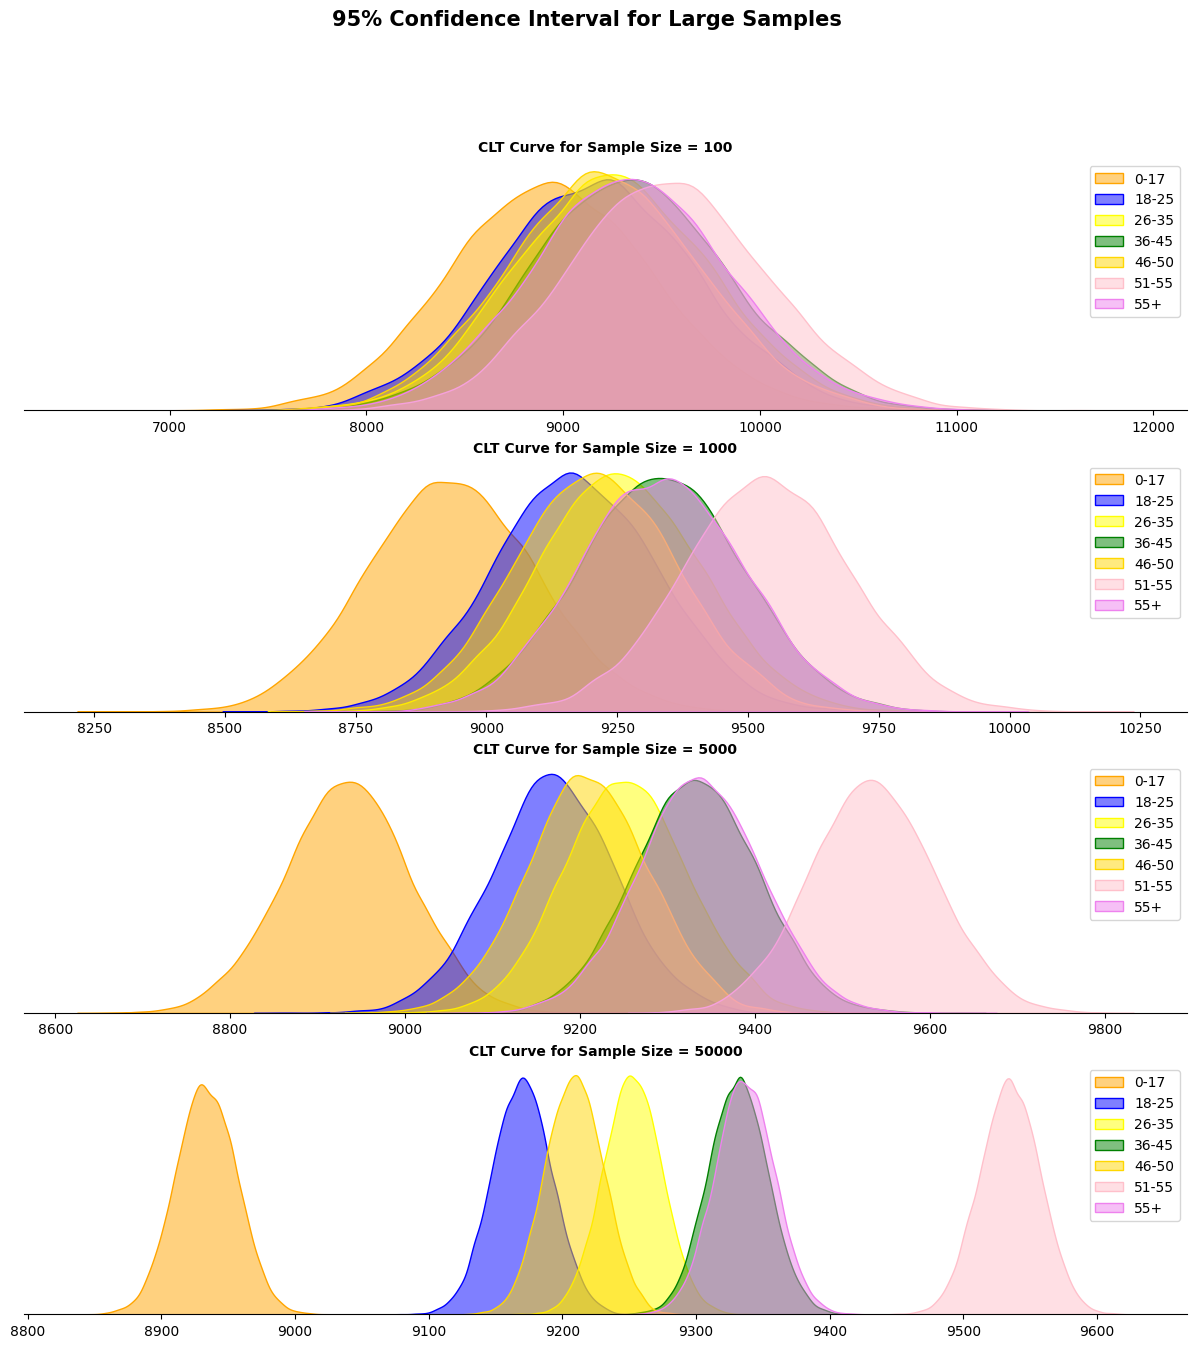

In [50]:
sample_and_plot_age_vs_purchase(confidence=0.95, sample_sizes=[30, 50, 100], num_samples=5000)
age_sample1,age_sample2,age_sample3,age_sample4,age_sample5,age_sample6,age_sample7 = plot_age_vs_purchase(95)

**Observation**

**Normalization of Distributions:**

**Small Sample Sizes (100):**

* At this level, the distributions are wider and less smooth, indicating higher variability in the sample means. This is typical for smaller sample sizes where the Central Limit Theorem has not fully taken effect.

**Increasing Sample Sizes (1000 to 50000):**
* As the sample size increases, each distribution becomes narrower and more bell-shaped. This illustrates the CLT in action, where the distribution of sample means approaches a normal distribution as sample size increases, reducing the variability of the sample means.

**Mean Purchase Values by Age Group:**

* It appears that different age groups may have different central tendencies (means). This suggests variability in purchasing behavior based on age.
* Typically, the central peaks shift slightly depending on the age group, reflecting differences in average spending.

**Confidence Intervals:**

* With larger sample sizes, the confidence intervals (shown by the shaded regions around the peaks) become narrower. This indicates more precision in the estimation of the mean purchase values.
* A narrower confidence interval means we are more confident that the mean purchase value calculated from the sample accurately represents the population mean.
* 0 - 17 - Lowest spending per transaction
* 18 - 25, 26 - 35, 46 - 50 - Overlapping confidence intervals indicating similar buying characteristics
* 36 - 45, 55+ - Overlapping confidence intervals indicating and similar spending patterns
* 51 - 55 - Highest spending per transaction

**Overlap Between Age Groups:**

* Overlapping curves between different age groups suggest that there may not be significant differences in mean purchases between these groups, especially where the confidence intervals overlap.
* Where there is less overlap, it suggests potential differences in purchasing behavior that could be statistically significant.

**Behavior at Large Sample Sizes (5000, 50000):**

* At these sizes, the effect of the CLT is pronounced, showing very tight confidence intervals and clear separations between different age groups where they exist. This is crucial for making reliable inferences about differences in mean purchases among age groups.

**Practical Implications:**
* **Marketing and Product Targeting:** Understanding which age groups spend more can help businesses tailor their marketing strategies to target these groups more effectively. Age group 0-17 can be attracted with more attractive discounts, coupons, or rewards programs.
* **Inventory and Sales Strategies:** Knowing the purchasing power of different age groups can assist in inventory control and sales strategies, optimizing stock levels according to the buying tendencies of these groups. Age group 18 - 25, 26 - 35, 46 - 50, 36 - 45 and 55+ fall in the group where they have common buying patterns. Walmart can optimize its product selection to cater to the preferences of these age groups.
* **Customer Segmentation:** This data can be used to refine customer segmentation models, ensuring that marketing and sales efforts are directed towards the most lucrative age segments.
* **Resource Allocation:** For strategic decisions, knowing where the most significant differences lie (as indicated by non-overlapping confidence intervals) can guide where to allocate resources most effectively to capitalize on these differences. With age group 51 - 55 having the highest spending per transaction, Walmart can provide them premium services and loyalty programs.


# Recommendations:




1. **Target male customers:** Since males do a higher purchase during Black Friday, they should be targetted with tailored strategies that address their likeness and preferences. Custom advertisements and offers will prove useful. Understanding that males have higher mean purchases, marketing efforts can be strategically directed to cater to male consumers with promotions, advertisements, or product placements that align with male preferences and purchasing power.
The products that are likely driving these higher purchases among males could be stocked more robustly or diversified to enhance sales further. Similarly, for females, understanding the specific products that contribute to their spending can help in planning targeted promotions or offers.

2. **Create loyalty programs:** The age group 51-55 are the higest spenders in Walmart. Hence this group of customers should be retained with attractive offers such as loyalty programs. Walmart can provide them exclusive access rights. Since black friday sales are always a rushed experience, Walmart can provide this age group premium access to product categories.

3. **Attract new customers:** It is also observed that customers who have been staying less than a year in a city tend to purchase more items in Walmart. Although this demographic is not the highest spending group, Walmart can attract them by providing some attractive offers such as early bird access or new customer bonus.

4. **Cater to heavy spenders:** The age group 26-45 are amongst the highest spenders during Black Friday. Walmart can provide them attactive offers such as discounts and bulk deals to keep this demograpy interested.

5. **Cater to occupations:** Its observed that the top 3 occupations occupy 37% of the total distribution. These customers have high demand for Walmart product. These customers have high disposable income. Walmart can provide them exclusive access by creating partnerships with their employers.

6. **Increase Product Category Distribution:** It is observed that product category 5, 1, 8 make the highest sales and cover more than 75% of the total sales.However the top Product IDs occupy only 0.34% of the total sales This also means that Walmart has a very high number of products for sales. This count was calculated to 550068 items. Walmart can increase their inventory on the highest selling product categories and reduce the inventory for bottom numbers.

7. **Attract female customers:** It is observed that females spend 3 times less than males. Walmart can attract female customers by targetting products that are a requirement for females and offer discounts in them.

8. **Increase location sales:** It is observed that City B has more footfall in Walmart than A and B. A and B are almost similar to their counts. This could probably mean that City B is nearer to the Walmart. This could also mean that city A and city B may have other options than Walmart to go. Walmart can drive increased sales by doing promotions of discounts for Black Friday within popular cities.

